<h1 style="color:red">LOAD AND PEEK INSIDE THE DATASET</h1>

<h2 style='color:#E50914'>IMPORT LIBRARIES</h3>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [223]:
import sys
import os

# Add the analysis folder to Python path (relative to notebooks/)
sys.path.append(os.path.abspath(os.path.join('..', 'analysis')))

# Now you can import from analysis/ modules directly
from data_prep import (
    load_data, preview_data, clean_missing_values, 
    convert_dtypes, handle_outliers
)

from eda_plots import (
    plot_violin, plot_scatter, plot_type_rating_heatmap,
    plot_correlation_heatmap, plot_geo_map, plot_sunburst,
    plot_treemap, plot_radar, plot_donut, plot_area,
    plot_bump, plot_wordcloud, plot_lollipop,
    plot_swarm, plot_sankey
)


<h2 style='color:#E50914'>Load Netflix Dataset</h3>

In [9]:
df = load_data(r"C:\Users\HP\OneDrive\Desktop\streaming-statistics\data\netflix_titles.csv")


<h2 style='color:#E50914'>Preview the Dataset</h3>

In [14]:
preview = preview_data(df)

print("Columns:", preview["columns"])
display(preview["head"])

Columns: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

<h2 style='color:#E50914'>Dataset Dimensions</h3>

In [17]:
print("Shape of the dataset::", preview["shape"])

Shape of the dataset:: (8807, 12)


<h3 style='color:#E50914'>Netflix Dataset Columns</h3>

In [20]:
print("Columns:", preview["columns"])

Columns: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


<h3 style='color:#E50914'>Netflix Data Overview</h3>

In [23]:
print("\nData Info:")
df.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


<h3 style='color:#E50914'>Extracting All Numeric Features</h3>

In [26]:
df.select_dtypes(include='number')

release_year
0             2020
1             2021
2             2021
3             2021
4             2021
...            ...
8802          2007
8803          2018
8804          2009
8805          2006
8806          2015

[8807 rows x 1 columns]

<h3 style='color:#E50914'>Descriptive Stats for All Columns</h3>

In [29]:
print('\nSummary Statistics:')
df.describe(include="all")


Summary Statistics:


show_id   type   title       director                cast  \
count     8807   8807    8807           6173                7982   
unique    8807      2    8807           4528                7692   
top      s8807  Movie  Zubaan  Rajiv Chilaka  David Attenborough   
freq         1   6131       1             19                  19   
mean       NaN    NaN     NaN            NaN                 NaN   
std        NaN    NaN     NaN            NaN                 NaN   
min        NaN    NaN     NaN            NaN                 NaN   
25%        NaN    NaN     NaN            NaN                 NaN   
50%        NaN    NaN     NaN            NaN                 NaN   
75%        NaN    NaN     NaN            NaN                 NaN   
max        NaN    NaN     NaN            NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7976             8797   8807.000000   8803      8804   
unique            748             1767           NaN     17       220   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2818              109           NaN   3207      1793   
mean              NaN              NaN   2014.180198    NaN       NaN   
std               NaN              NaN      8.819312    NaN       NaN   
min               NaN              NaN   1925.000000    NaN       NaN   
25%               NaN              NaN   2013.000000    NaN       NaN   
50%               NaN              NaN   2017.000000    NaN       NaN   
75%               NaN              NaN   2019.000000    NaN       NaN   
max               NaN              NaN   2021.000000    NaN       NaN   

                           listed_in  \
count                           8807   
unique                           514   
top     Dramas, International Movies   
freq                             362   
mean                             NaN   
std                              NaN   
min                              NaN   
25%                              NaN   
50%                              NaN   
75%                              NaN   
max                              NaN   

                                              description  
count                                                8807  
unique                                               8775  
top     Paranormal activity at a lush, abandoned prope...  
freq                                                    4  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN

<h3 style='color:#E50914'>Missing Data Alert!</h3>

In [32]:
print("\nMissing values per columns:")
df.isnull().sum().sort_values(ascending=False)


Missing values per columns:


director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

<h3 style='color:#E50914'>Column-wise Missing %</h3>

In [35]:

missing_percentages=(df.isnull().sum().sort_values(ascending=False) / len(df)) * 100
print("\nMissing percentages per columns:",missing_percentages)


Missing percentages per columns: director        29.908028
country          9.435676
cast             9.367549
date_added       0.113546
rating           0.045418
duration         0.034064
show_id          0.000000
type             0.000000
title            0.000000
release_year     0.000000
listed_in        0.000000
description      0.000000
dtype: float64


<h3 style='color:#E50914'>Only the Guilty Columns (with Missing Values)</h3>

In [38]:
missing_percentages[missing_percentages !=0]

director      29.908028
country        9.435676
cast           9.367549
date_added     0.113546
rating         0.045418
duration       0.034064
dtype: float64

<h3 style='color:#E50914'>Visualizing Missing Data with Bar Chart</h3>

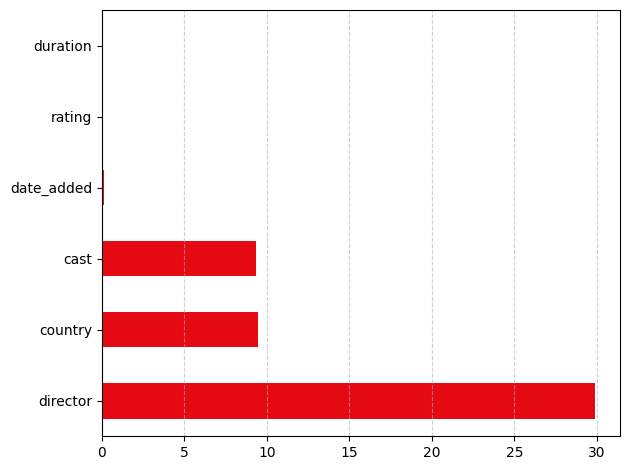

In [41]:
missing_percentages[missing_percentages !=0].plot(kind="barh",
                                                  color="#E50914")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


 <h4 >• What this code does: </h4>
This line of code generates a horizontal bar chart to visualize missing data in the dataset. The missing_percentages variable holds the percentage of missing values for each column. By applying missing_percentages != 0, we filter out only those columns that actually have missing values. The .plot(kind="barh", ...) method then creates a horizontal bar chart, which makes it easy to compare missing data across columns. The color="#FF69B4" adds a vibrant pink color to the bars, making the chart not only informative but also visually appealing and easy to read.

 <h4> • What this chart shows: </h4>
-Each bar represents a column in the dataset.<br>
-The length of the bar tells you the percentage of missing values in that column.<br>
-Longer bars = more missing data = more attention needed!<br>

<h4> • Why this graph matters:</h4>
-Gives a quick visual summary of missing data — easier to interpret than numbers alone.<br>
-Helps you prioritize data cleaning — you know which columns need fixing first.<br>
-Lets you spot columns with severe missingness that might not be usable at all.
-A polished way to show that you understand the completeness of your dataset.<br>

 <h4> • <u>Conclusion:</u></h4>
This missing value bar chart provides a fast and effective way to diagnose data quality issues. By visualizing where the holes are, we make smarter decisions about whether to fill, drop, or investigate further.

<h1>HANDLING MISSING VALUES</h1>

In [46]:
df = clean_missing_values(df)

 <h4>• Handling Missing Values in the 'country' Column (Groupwise Mode Imputation) </h4>
To fill the missing values in the 'country' column, we applied context-aware imputation using the most frequent country (mode) based on each combination of 'type' (e.g., Movie or TV Show) and 'listed_in' (genre/category).<br>
Rather than using a single global value like 'Unknown', this method ensures that the missing 'country' values are filled with the most appropriate values within their specific content group.

<h4>• Why this works better: </h4>
-It keeps the imputed data relevant to its genre and type.<br>
-Reduces the bias of filling all missing values with one static value.<br>
-Keeps the dataset more realistic and informative for further analysis or modeling.


 <h4>• Small Example:</h4>

| type    | listed\_in    | country       |
| ------- | ------------- | ------------- |
| Movie   | Dramas        | India         |
| Movie   | Dramas        | India         |
| Movie   | Dramas        | *NaN*         |
| TV Show | Kids' TV      | United States |
| TV Show | Kids' TV      | *NaN*         |
| Movie   | Comedies      | *NaN*         |
| Movie   | Comedies      | Canada        |
| TV Show | Documentaries | *NaN*         |


 <h4>• After applying the groupwise mode fill:</h4>
 
| type    | listed\_in    | country             |
| ------- | ------------- | ------------------- |
| Movie   | Dramas        | India               |
| Movie   | Dramas        | India               |
| Movie   | Dramas        | **India** ✅         |
| TV Show | Kids' TV      | United States       |
| TV Show | Kids' TV      | **United States** ✅ |
| Movie   | Comedies      | **Canada** ✅        |
| Movie   | Comedies      | Canada              |
| TV Show | Documentaries | **Unknown** ✅       |



 <h4>• <u>Conclusion: </u> </h4>
This method is especially useful in real-world datasets where missing values depend on the context. By using grouped mode imputation, we preserve the original patterns in the data while filling in the gaps with statistically sensible values.

<h3 style='color:#E50914'>Column-wise Missing %</h3>

In [50]:

missing_percentages=(df.isnull().sum().sort_values(ascending=False) / len(df)) * 100
print("\nMissing percentages per columns:",missing_percentages)


Missing percentages per columns: show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64


<h3 style='color:#E50914'>Before and After Cleaning: Visualizing the Reduction of Missing Values Per Column</h3>

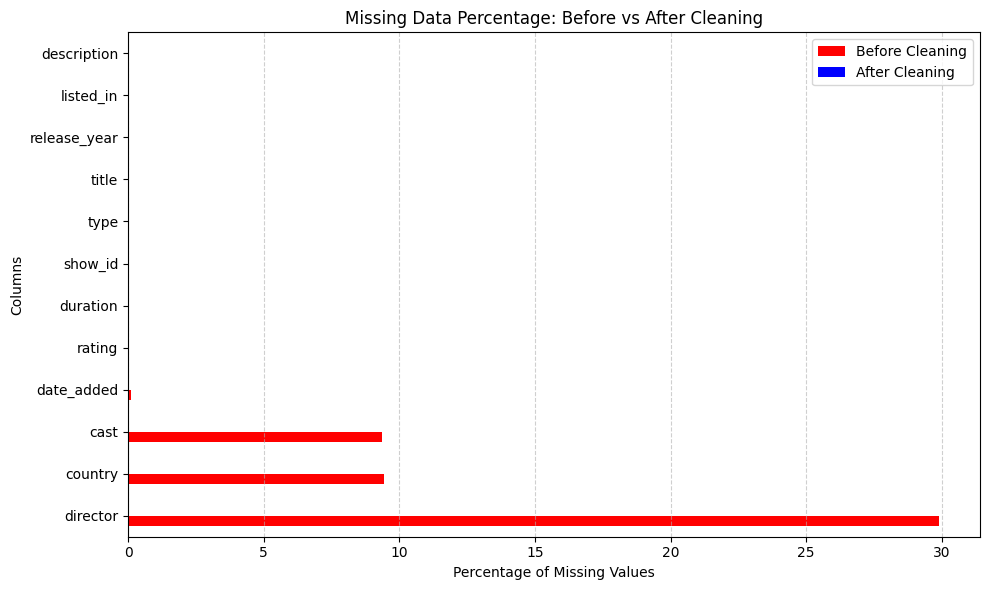

In [53]:

# Step 1: Create the "Before" and "After" missing percentage data
before_missing = {
    'director': 29.91,
    'country': 9.44,
    'cast': 9.37,
    'date_added': 0.11,
    'rating': 0.045,
    'duration': 0.034,
    'show_id': 0.0,
    'type': 0.0,
    'title': 0.0,
    'release_year': 0.0,
    'listed_in': 0.0,
    'description': 0.0
}

after_missing = {
    'director': 0.0,
    'country': 0.0,
    'cast': 0.0,
    'date_added': 0.0,
    'rating': 0.0,
    'duration': 0.0,
    'show_id': 0.0,
    'type': 0.0,
    'title': 0.0,
    'release_year': 0.0,
    'listed_in': 0.0,
    'description': 0.0
}

# Step 2: Convert to DataFrame
missing_df = pd.DataFrame({
    'Before Cleaning': before_missing,
    'After Cleaning': after_missing
})

# Step 3: Plotting
missing_df.plot(kind='barh', figsize=(10, 6), color=['red','blue'])

plt.title("Missing Data Percentage: Before vs After Cleaning")
plt.xlabel("Percentage of Missing Values")
plt.ylabel("Columns")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


<h4>• Visualizing Missing Data: Before vs After Cleaning </h4>
The graph compares the percentage of missing values in each column before and after the data cleaning process. The pink bars represent the initial state of the dataset, where several columns such as 'director', 'cast', and 'country' had significant proportions of missing data—nearly 30% in the case of 'director'. The firebrick red bars represent the state after cleaning, showing that these missing values have been effectively addressed, bringing every column down to 0% missing data.

<h4>• Why This Matters </h4>
Understanding and resolving missing data is a crucial step in data preparation. High percentages of null values can lead to:
-Inaccurate analysis<br>
-Biased models<br>
-Broken visualizations<br>
-Reduced performance of machine learning algorithms<br>

By cleaning the missing data, we ensure the dataset is consistent, reliable, and ready for meaningful exploration and modeling.


<h4>• Surprises or Anomalies </h4>
The most noticeable surprise was the high volume of missing data in the 'director' and 'cast' columns, which are often considered rich sources for recommendation systems or content analysis. Their absence could have posed challenges if left untreated. Fortunately, with thoughtful imputation strategies (like filling with 'Unknown' or using group-based mode), we preserved the dataset’s usability.

<h4>• <u>Summary of Insights and Takeaways </u></h4>
-Several columns had moderate to high levels of missing data, especially 'director' (≈30%) and 'cast' (≈9.4%).<br>
-After applying targeted imputation strategies, all missing values were successfully handled, resulting in a completely clean dataset.<br>
-This transformation ensures a solid foundation for downstream analysis, whether it's visualization, statistical modeling, or machine learning.<br>
-By resolving missing data early on, we improve the quality and credibility of every insight we draw from this dataset moving forward. 

<h3 style='color:#E50914'>Spotting Repeated Rows in the Dataset</h3>

In [57]:

df.duplicated().sum()

np.int64(0)

<h1> Why We Convert Columns into Specific Data Types</h1>

<h4>• Why We Convert Columns into Specific Data Types </h4>
Assigning the correct data types to each column is essential for clean, efficient, and reliable data analysis.
It’s like giving each column the right job title—so it performs better and behaves as expected.

<h4>•Benefits of Converting Data Types: </h4>
-Accurate operations: For example, converting a 'date_added' column to datetime allows you to:<br>
    Extract year/month (df['date_added'].dt.year)<br>
    Sort records by date<br>
    Calculate durations (e.g., days since added)<br>
<br> 
-Improved performance: Converting repetitive string values (like 'country', 'rating', or 'type') to the category type:<br>
    Reduces memory usage<br>
    Speeds up operations like filtering, grouping, and joining<br>
<br> 
-Avoids errors: Ensures Python doesn’t treat numeric values as strings or overlook sorting rules for dates.

<h4>• Real-life Example: </h4>
Imagine having 10,000 records with the value 'Movie' repeated in the 'type' column.
As a string, each copy takes up memory. As a category, it’s stored just once and referenced—way more efficient!

In [61]:
df = convert_dtypes(df)

In [63]:
print("\nData Info:")
df.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 8804 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   show_id        8804 non-null   object        
 1   type           8804 non-null   category      
 2   title          8804 non-null   object        
 3   director       8804 non-null   object        
 4   cast           8804 non-null   object        
 5   country        8804 non-null   category      
 6   date_added     8706 non-null   datetime64[ns]
 7   release_year   8804 non-null   int64         
 8   rating         8804 non-null   category      
 9   duration       8804 non-null   object        
 10  listed_in      8804 non-null   category      
 11  description    8804 non-null   object        
 12  duration_int   8804 non-null   int64         
 13  duration_type  8804 non-null   object        
dtypes: category(4), datetime64[ns](1), int64(2), object(7)
memory usa

<h1>CHECKING OUTLIERS</h1>

 <h4>• Why We Remove Outliers</h4>
Outliers are values that are significantly higher or lower than the rest of the data. They can be genuine but rare, or they might be data errors. Either way, they need attention before analysis or modeling.

 <h4>• Why Removing Outliers Matters: </h4>
- Improves visualizations:One extreme value can stretch a graph and make everything else look squished or flat.<br>
- Protects statistical integrity: Outliers can skew the mean, inflate standard deviations, and give a misleading picture of the data.<br>
- Enhances model performance: Machine learning models can overfit or misinterpret data patterns if outliers aren’t addressed.<br>

 <h4>• Real-life Example: </h4>
If most movie durations are around 90 minutes, but a few entries show 900 or 0 minutes due to entry errors, these outliers can heavily impact your average and model predictions.



<h2>HANDLING OUTLIERS </h2>

<h3 style='color:#E50914'>Boxplot of 'duration_int' to Identify Outliers and Distribution </h3>

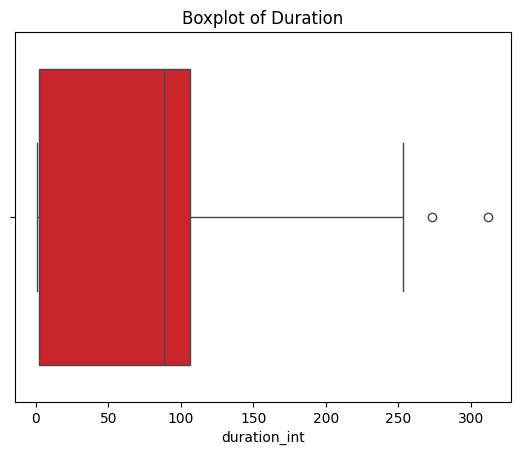

In [72]:
#plt.figure(figsize=(10,1))
sns.boxplot(x=df['duration_int'],
           color='#E50914')
plt.title('Boxplot of Duration')
plt.show()

<h3 style='color:#E50914'>Top Titles with the Longest Duration-Binge-Worthy or Too Much? </h3>

In [75]:
df[['title','type','duration_int','duration_type']].sort_values(by="duration_int",ascending=False)

title     type  duration_int  \
4253              Black Mirror: Bandersnatch    Movie           312   
717              Headspace: Unwind Your Mind    Movie           273   
2491                  The School of Mischief    Movie           253   
2487                          No Longer kids    Movie           237   
2484                      Lock Your Girls In    Movie           233   
...                                      ...      ...           ...   
66             Raja Rasoi Aur Anya Kahaniyan  TV Show             1   
8758                  World's Busiest Cities  TV Show             1   
37                               Angry Birds  TV Show             1   
40    He-Man and the Masters of the Universe  TV Show             1   
11                          Bangkok Breaking  TV Show             1   

     duration_type  
4253           min  
717            min  
2491           min  
2487           min  
2484           min  
...            ...  
66          Season  
8758        Season  
37          Season  
40          Season  
11          Season  

[8804 rows x 4 columns]

<h3 style='color:#E50914'>Blink and It’s Over: Zero-Duration Titles</h3>

In [78]:
df[df['duration_int'] == 0][['title', 'type', 'duration', 'duration_int']]


Empty DataFrame
Columns: [title, type, duration, duration_int]
Index: []

<h3 style='color:#E50914'>Identifying Duration Outliers Using the IQR Method</h3>

In [81]:
Q1=df['duration_int'].quantile(0.25)
Q3=df['duration_int'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outliers=df[(df['duration_int'] < lower_bound) |
            (df['duration_int'] > upper_bound)]


outliers[['title', 'type', 'duration', 'duration_int']]

title   type duration  duration_int
717   Headspace: Unwind Your Mind  Movie  273 min           273
4253   Black Mirror: Bandersnatch  Movie  312 min           312

<h3 style='color:#E50914'>Standard or Interactive? Let’s Label the Fun Ones</h3>

In [84]:
# interactive_titles=[
#     'Headspace: Unwind Your Mind',
#     'Black Mirror: Bandersnatch'
# ]
# df['duration_note']=df['title'].apply(lambda x: 'interactive' if x in interactive_titles else 'standard')


 <h4 style="color:black">• What the Code is Doing: </h4>
This code is creating a new column called 'duration_note', which labels each title as either 'interactive' or 'standard' based on whether it’s part of a predefined list of known interactive shows (like Black Mirror: Bandersnatch and Headspace: Unwind Your Mind). These shows are special because they allow user input or decision-making during viewing—unlike traditional linear content.

 <h4 style="color:black">• Why This Matters:</h4>
-Tagging content like this opens the door to deeper analysis, such as:
-Comparing average duration between interactive and standard content
-Understanding user engagement or recommendation performance
-Filtering for non-traditional experiences in your dataset

In many streaming datasets, treating all content equally ignores these special formats, which may behave differently in terms of duration, popularity, or release patterns.

 <h4 style="color:black">• Any Surprises or Anomalies? </h4>
-It may be surprising how few interactive titles currently exist, highlighting how rare this content type still is in the broader catalog.
-You might also notice that interactive content often doesn't follow traditional duration patterns, which could influence future visualizations or models if not treated separately.

 <h4 style="color:black">• <u>Summary of Insights and Takeaways:</u></h4>
-A new column 'duration_note' has been created to classify content into 'interactive' and 'standard'.
-This classification adds important contextual meaning to the dataset, helping to separate unique formats from typical content.
-This feature can be used later to filter, compare, or visualize interactive content specifically—especially when looking at trends, durations, or engagement.

<h3 style='color:#E50914'>Filtering Movie Duration Outliers While Retaining Interactive Content</h3>

In [88]:
# clean_df = df[
#     (df['type'] != 'Movie') | 
#     ((df['type'] == 'Movie') & (
#         (df['duration_int'] <= 250) | (df['duration_note'] == 'interactive')
#     ))
# ].copy() 

# clean_df.drop(columns='duration_note', inplace=True)



# Handled the outliers in the data_prep.py file. This code is just for the insights.

 <h4>• What This Code Is Doing: </h4>
-The code filters out movie entries that have unusually high durations — specifically anything over 250 minutes — 
as these are likely outliers or data entry errors. However, there’s a thoughtful exception made: if a movie is labeled as interactive, 
it is still retained even if it exceeds the duration threshold. This is because interactive content often breaks traditional runtime norms.

-Once the filtering is complete, the temporary column 'duration_note' is removed to keep the dataset clean and focused.

<h4>• Why This Step Matters: </h4>
Cleaning out extreme values helps:<br>
-Ensure more accurate statistics and visualizations<br>
-Prevent skewing of machine learning models or plots<br>
-Make the data more representative of typical user experiences<br>

However, blindly removing long-duration content would’ve excluded interactive shows, which are intentionally unique in format. 
Including them acknowledges their value and prevents the loss of relevant information.


 <h4>• Any Surprises or Anomalies? </h4>
-The decision to allow long-duration interactive content highlights that not all outliers are bad — some are just different by design.<br>
-It’s also a great example of domain knowledge meeting data cleaning. Without this exception, 
interactive experiences like Bandersnatch could have been wrongly removed.

 <h4>• <u> Summary of Insights and Takeaways: </u> </h4>
-The dataset has been cleaned to remove movies over 250 minutes, which are likely abnormal or incorrect.<br>
-Interactive titles are safely retained even if they exceed this limit, recognizing their unique format.<br>
-The result is a cleaner, more balanced dataset — ready for analysis, without losing the richness of modern, nonlinear content.<br>

This step shows thoughtful filtering in action: smart, specific, and respectful of the content type.

<h3 style='color:#E50914'>Boxplot of 'release_year' to Identify Outliers and Distribution </h3>

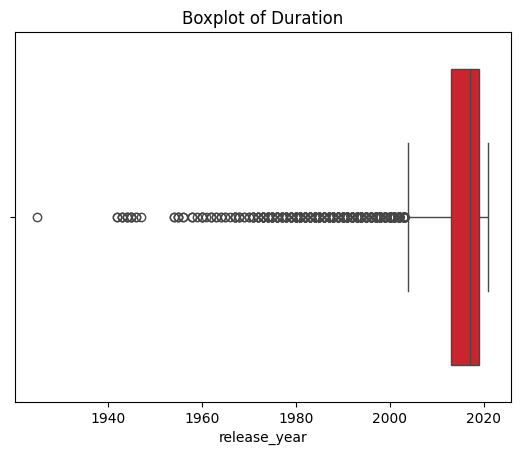

In [94]:
sns.boxplot(x=df['release_year'],
            color='#E50914')
plt.title('Boxplot of Duration')
plt.show()

In [96]:
df[['title','type','release_year','description']].sort_values('release_year').head(20)

title     type  release_year  \
4250                 Pioneers: First Women Filmmakers*  TV Show          1925   
7790                                    Prelude to War    Movie          1942   
8205                              The Battle of Midway    Movie          1942   
8739                Why We Fight: The Battle of Russia    Movie          1943   
8660     Undercover: How to Operate Behind Enemy Lines    Movie          1943   
8763                   WWII: Report from the Aleutians    Movie          1943   
8640                                  Tunisian Victory    Movie          1944   
8419  The Memphis Belle: A Story of a\nFlying Fortress    Movie          1944   
8436                                 The Negro Soldier    Movie          1944   
7575                          Nazi Concentration Camps    Movie          1945   
7219                           Know Your Enemy - Japan    Movie          1945   
1331               Five Came Back: The Reference Films  TV Show          1945   
7930                                        San Pietro    Movie          1945   
7743               Pioneers of African-American Cinema  TV Show          1946   
7294                                Let There Be Light    Movie          1946   
8587                                       Thunderbolt    Movie          1947   
2375                                   The Blazing Sun    Movie          1954   
1699                                   White Christmas    Movie          1954   
8506                                 The Sign of Venus    Movie          1955   
7954                               Scandal in Sorrento    Movie          1955   

                                            description  
4250  This collection restores films from women who ...  
7790  Frank Capra's documentary chronicles the rise ...  
8205  Director John Ford captures combat footage of ...  
8739  This installment of Frank Capra's acclaimed do...  
8660  This World War II-era training film dramatizes...  
8763  Filmmaker John Huston narrates this Oscar-nomi...  
8640  British and American troops join forces to lib...  
8419  This documentary centers on the crew of the B-...  
8436  This documentary urged African Americans to en...  
7575  Shocking footage shows Nazi concentration camp...  
7219  Though culturally insensitive by modern standa...  
1331  This collection includes 12 World War II-era p...  
7930  After the Allies invade Italy, the Liri Valley...  
7743  This newly preserved collection features more ...  
7294  Some returning combat veterans suffer scars th...  
8587  A P-47 Thunderbolt squadron is shown in prepar...  
2375  Competition between sugar cane producers turns...  
1699  Two war buddies fall for two sisters and follo...  
8506  While suitors swoon over her cousin, a single ...  
7954  When a marshal moves back to his hometown, he ...

• While analyzing the 'release_year' column, we discovered several extremely old titles, some dating back to 1925. 
Statistically, these fall outside the IQR range and could be considered outliers. 
However, upon closer inspection, these entries are legitimate archival content such as WWII documentaries and restored historical films, 
indicating valid edge cases rather than data issues.

<h4 style="color:#0CAFFF">• <mark>Takeaway: Not all outliers are errors — some are simply rare and meaningful. Context is key in data cleaning decisions!</mark></h4>

<h3 style='color:#E50914'>Bye-Bye Outliers: Counting Rows Removed During Data Cleaning</h3>

In [105]:
df = handle_outliers(df)

In [118]:
from analysis.data_prep import load_data
from analysis.insights import *

<h1 style="color:red"> EXPLORE DATASET</h1>

<h2>1. What types of content are on Netflix? </h2>

In [122]:
df['type'].value_counts(normalize=True) * 100

type
Movie      69.601272
TV Show    30.398728
Name: proportion, dtype: float64

 <h4>• Insights & Takeaways: </h4>
-Movies dominate the platform, representing nearly 70% of the total content.<br>
-TV Shows make up around 30%, offering episodic or series-based content.<br>
-This reflects Netflix’s strong focus on feature-length content, although it still maintains a solid library of TV series to cater to binge-watchers. <br>
<br>
Understanding this breakdown is essential when analyzing user preferences, content recommendations, or preparing for a genre-specific analysis.

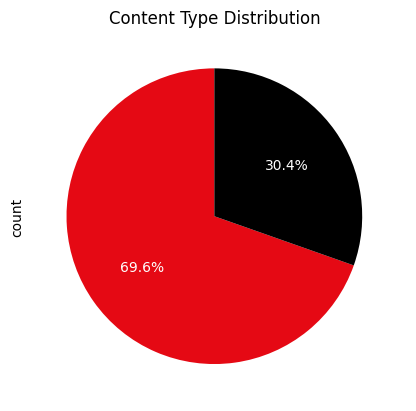

type
Movie      6127
TV Show    2676
Name: count, dtype: int64

In [125]:
content_type_distribution(df)

<h2>2. How has Netflix grown over the years?</h2>

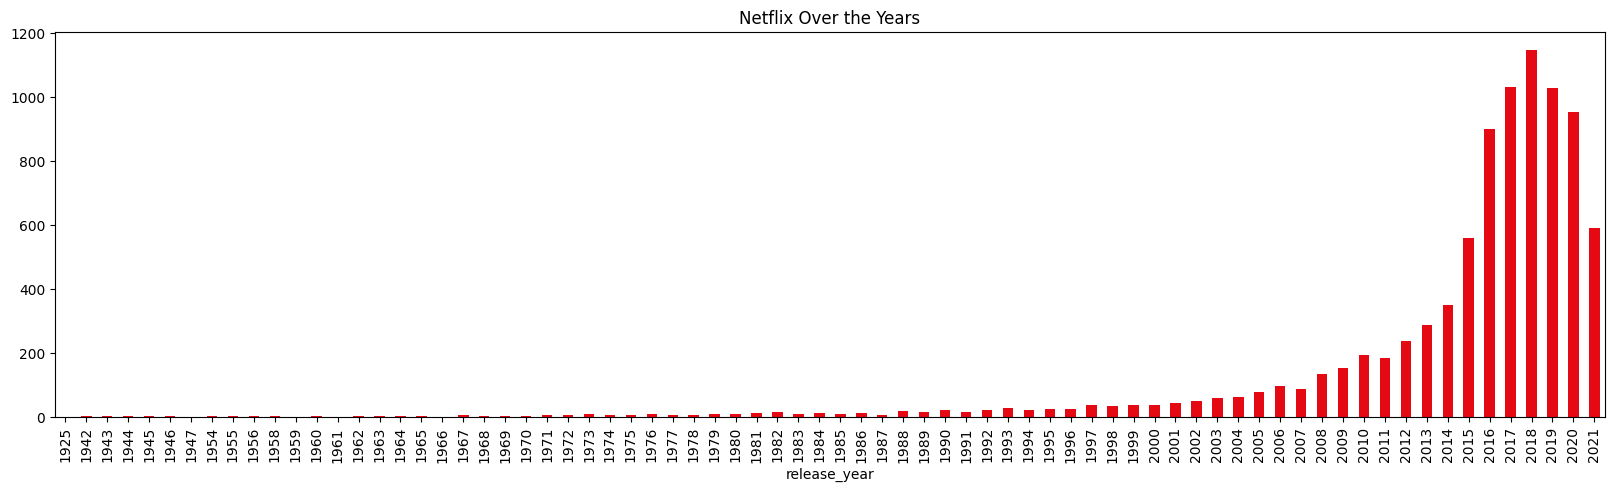

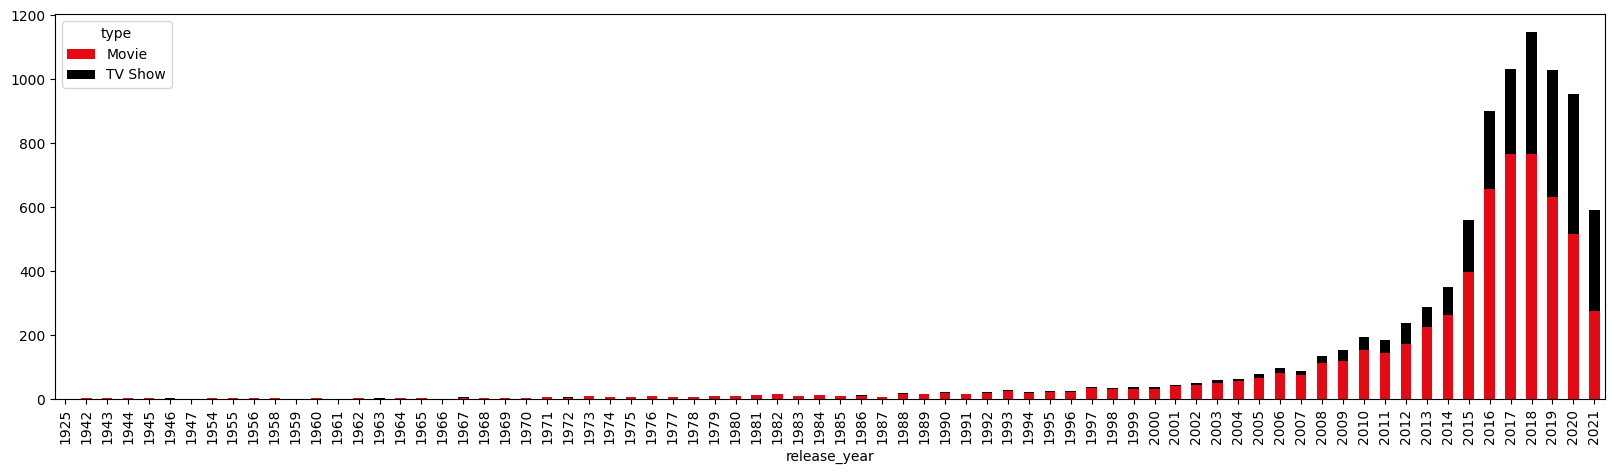

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1031
2018    1147
2019    1030
2020     953
2021     592
Name: count, Length: 74, dtype: int64

In [129]:
netflix_growth(df)

 <h4>•How Has Netflix Grown Over the Years? </h4>
To analyze Netflix’s growth, we visualized the number of titles released each year using a bar chart. 
The code groups titles by their 'release_year' and plots them in chronological order to reveal trends over time.

 <h4 >• What the 1st Graph Shows: </h4>
The graph displays the number of titles released per year from the earliest entry (1925) up to 2021.<br>
-It shows a steady rise starting in the early 2000s, with a significant spike after 2015.<br>
-The peak appears around 2017–2018, after which there is a noticeable dip.<br>

 <h4 >• Why It Matters: </h4>
This timeline reflects Netflix’s content strategy evolution — shifting from a platform hosting licensed titles
to aggressively producing and releasing original content.<br>
-The sharp growth post-2015 aligns with Netflix's global expansion and investment in original productions.<br>
-Understanding this trend helps in identifying the most active production periods, which is useful for content analysis, 
recommendation models, or trend forecasting.

 <h4>• Any Surprises or Anomalies?</h4>
Early entries (before 1990) are very sparse, as expected — likely older films or documentaries added later for archival value.
The sharp decline after 2019 may indicate data collection lag, the impact of the COVID-19 pandemic on production,
or incomplete datasets for recent years.

 <h4 >•<u>Summary of Insights:</u></h4>
-Netflix’s content library has grown exponentially, especially after 2013.<br>
-The boom between 2015 and 2019 marks Netflix’s golden age of aggressive content scaling.<br>
-A drop in recent years could indicate a mix of production slowdown or data incompleteness.<br>

<mark>This graph clearly shows that Netflix has evolved from a content distributor into a global production powerhouse. </mark>



<h4>• How Have Movies and TV Shows Contributed to Netflix’s Growth?</h4>
-To gain deeper insights into the nature of Netflix's expansion, we grouped the data by both "release_year" and "type" (Movie or TV Show), then visualized it using a <b>stacked bar chart</b>.<br>
-This allows us to explore not just the volume of content added each year, but also the composition of that content.

<h4> • What the 2nd Graph Shows:</h4>
-The chart presents the year-wise breakdown of content added to Netflix, separated into Movies (blue) and TV Shows (orange). <br>
-It reveals a clear surge starting from 2013, with a dramatic spike between 2015 and 2019.<br>
-Movies have consistently dominated the platform's content releases, but TV Shows show significant growth during Netflix’s original content boom.<br>

<h4> • Why It Matters:</h4>

-This visualization shows Netflix’s <b>diversification strategy</b> — not just increasing content volume, but also expanding into series-based storytelling.<br>
-The rise in TV Shows post-2015 aligns with major hits like <i>Stranger Things</i> and <i>Narcos</i>, signaling Netflix’s push into binge-worthy series.



<h4> • Any Surprises or Anomalies?</h4>

- The chart shows that <b>TV Shows barely existed</b> in Netflix’s early content timeline — it was initially <b>a movie-heavy platform</b>.<br>
- The most recent years (2020–2021) show a drop in total releases, which may be due to pandemic-related production slowdowns or incomplete data.



<h4> • Summary of Insights:</h4>

- Netflix’s overall growth is driven primarily by movie releases, but TV Shows have played a critical role in recent years.<br>
- The stacked format helps us appreciate how both content types evolved together, making Netflix a balanced destination for both quick movie nights and long series binges.




<h1>3. Which countries  contribute the most content?</h1>

 <h2 style="color:#E50914"> Top 10 Content Producing Countries on Netflix </h2>

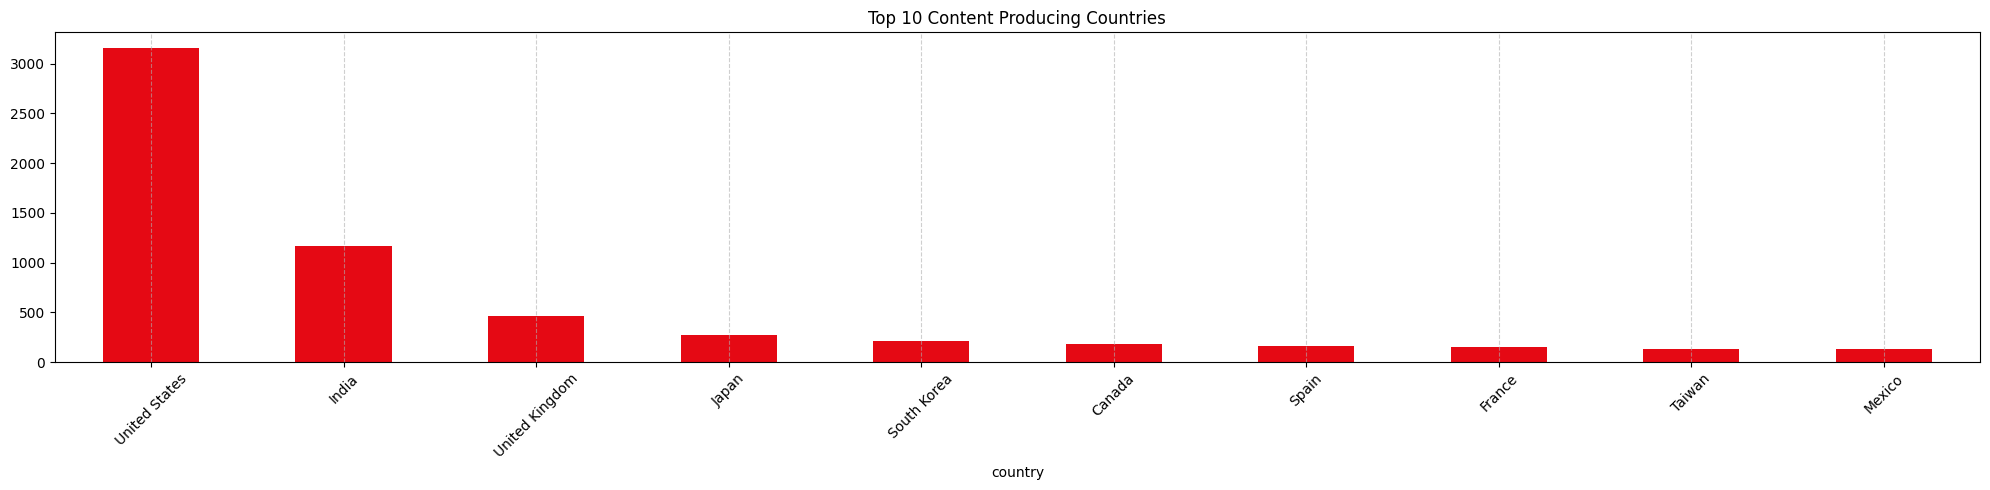

country
United States     3158
India             1165
United Kingdom     463
Japan              275
South Korea        212
Canada             183
Spain              163
France             149
Taiwan             136
Mexico             127
Name: count, dtype: int64

In [136]:
top_countries(df)

<h4>• Which Countries Contribute the Most Content to Netflix? </h4> 
This bar chart highlights the top 10 countries that contribute the most content to Netflix. As expected, the United States dominates the chart by a significant margin, followed by India and the United Kingdom.

<h4>• Why It Matters:</h4>

-This tells us where Netflix's primary content partnerships and investments lie.<br>
-Countries like India, Japan, and South Korea reflect Netflix’s push into regional content, especially in Asia.

<h4>• Any Surprises?</h4>
While the U.S. leads by a huge margin, it’s impressive to see non-English speaking countries like Japan, France, and Egypt making the list.

Some expected countries like Germany or Brazil may be missing due to lower title counts or incomplete metadata.

<h4> • <u> Summary:</u></h4>
Netflix’s library is heavily shaped by content from the U.S., but international content is clearly gaining ground. This supports the company's global strategy to diversify its offerings and reach audiences across cultures.



<h1>5. Who are the most featured directors or actors?</h1>

 <h2 style="color:#E50914"> Most Featured Directors on Netflix</h2>

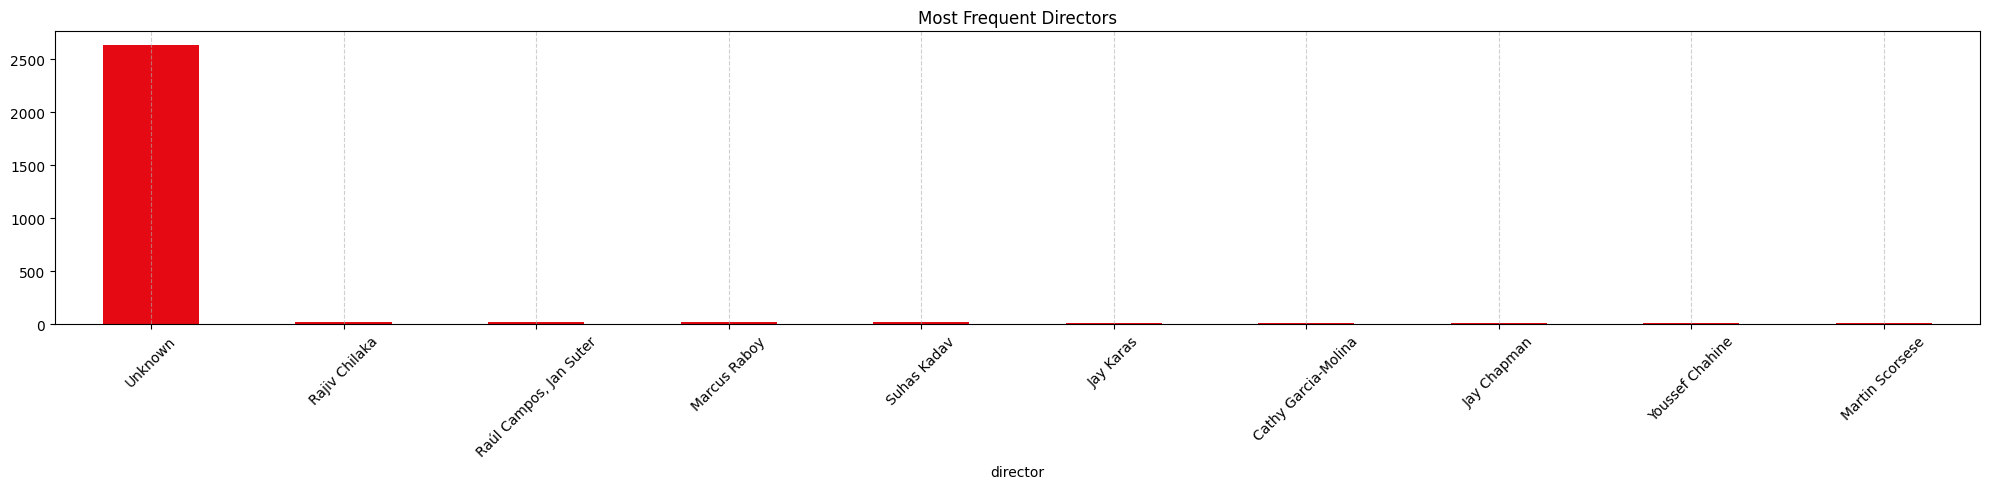

In [142]:
top_directors_series = top_directors(df)

<h4> • What the graph shows:</h4>
This bar chart highlights the 10 most frequently occurring directors in the Netflix dataset, including a placeholder for unknown entries.

<h4> • Why it matters: </h4>
It reveals the most prolific or frequently listed directors on the platform, showing whose content is most prevalent.

<h4> • Any surprises or anomalies:</h4>
The “Unknown” category dominates the chart. This indicates that a significant portion of entries lack metadata for the director field, which could affect detailed content analysis. Among named directors, a variety of global names appear.

<h4>• <u>Summary of insights: </u></h4>
-A high count of “Unknown” directors signals incomplete data. <br>
-Among known names, Raúl Campos, Marcus Raboy, and others have substantial presence.<br>
-Valuable for analyzing trends in direction, genres, and popularity over time.

 <h2 style="color:#E50914">Most Frequently Featured Actors on Netflix</h2>

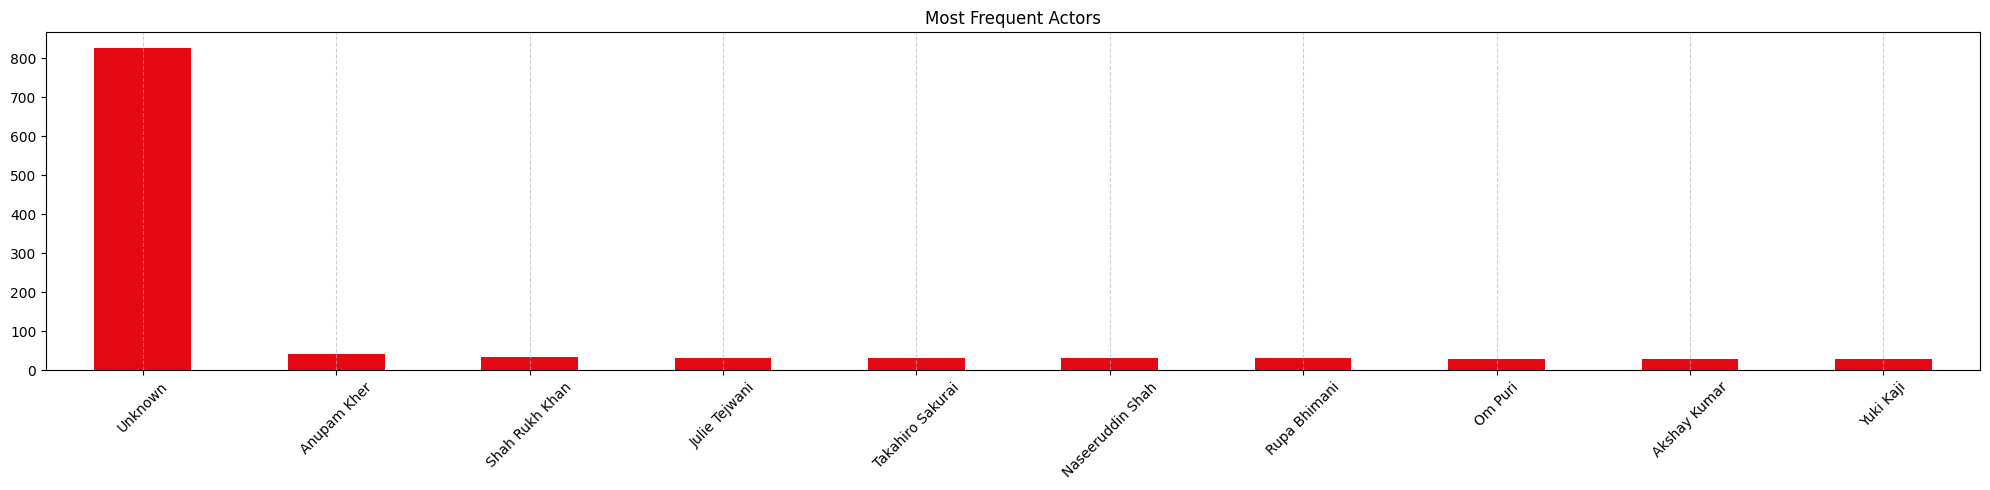

Unknown             825
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Takahiro Sakurai     32
Naseeruddin Shah     32
Rupa Bhimani         31
Om Puri              30
Akshay Kumar         30
Yuki Kaji            29
Name: count, dtype: int64

In [147]:
top_actors(df)

<h1> 6. What is the typical duration of movies on Netflix, and how are they distributed?</h1>

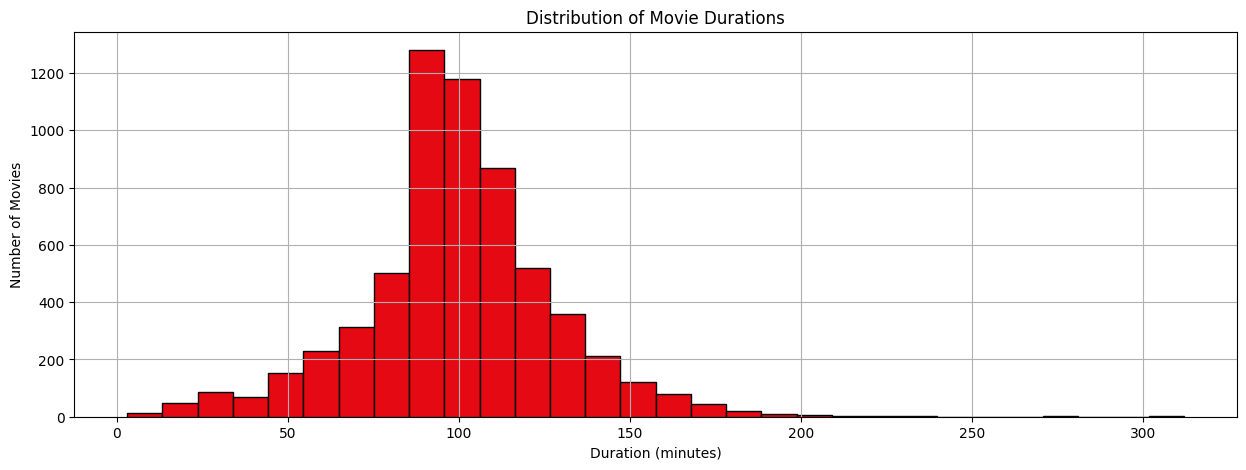

0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration_int, Length: 6127, dtype: int64

In [151]:
movie_duration_distribution(df)

The histogram illustrates the spread of movie durations on Netflix, using bins of 30 intervals. Each bar shows how many movies fall within a specific time range.

<h4>•  Key observations:</h4>
-Peak duration: The majority of Netflix movies hover around 90–100 minutes, aligning with the golden standard for feature-length films. <br>
-Distribution shape: The data forms a slightly right-skewed bell curve, meaning a large portion of the movies are under 120 minutes. <br>
-Tail ends: A few ultra-long movies stretch up to 300+ minutes—likely special genres like documentaries or miniseries. <br>

<h4>• Insights and interpretations: </h4>
-User-friendly length: Netflix appears to favor content that fits comfortably within a typical viewing session (under 2 hours). <br>
-Outliers exist but are rare, indicating most content is optimized for mass consumption. <br>
-Strategic length planning: If you're a filmmaker or content strategist, you now know where the sweet spot lies—aim for that 90-minute zone! <br>



<h1>6. How has the production of kids’ content changed over time?</h1>

In [156]:
df['rating'].value_counts()

rating
TV-MA       3211
TV-14       2159
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

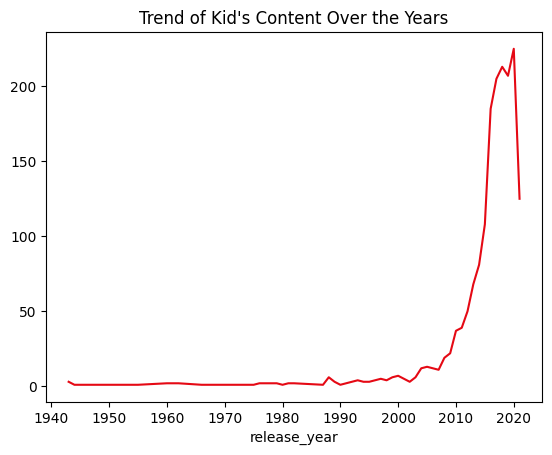

release_year
1943      3
1944      1
1946      1
1947      1
1954      1
1955      1
1960      2
1962      2
1966      1
1967      1
1969      1
1970      1
1972      1
1974      1
1975      1
1976      2
1977      2
1978      2
1979      2
1980      1
1981      2
1982      2
1987      1
1988      6
1989      3
1990      1
1991      2
1992      3
1993      4
1994      3
1995      3
1996      4
1997      5
1998      4
1999      6
2000      7
2001      5
2002      3
2003      6
2004     12
2005     13
2006     12
2007     11
2008     19
2009     22
2010     37
2011     39
2012     50
2013     68
2014     81
2015    108
2016    185
2017    205
2018    213
2019    207
2020    225
2021    125
Name: count, dtype: int64

In [158]:
kids_content_trend(df)

<h4> • What’s Happening in the Code? </h4>
Filtering for kid-appropriate shows/movies
The code filters the dataset for content rated TV-Y, TV-G, or TV-PG, which are all family-friendly:
-TV-Y: Suitable for all children, even toddlers. No scary stuff, no complicated themes — think shows like Cocomelon. <br>
-TV-G: “General audience.” Nothing inappropriate, but not necessarily aimed at kids — think nature documentaries or cooking shows. <br>
-TV-PG: “Parental Guidance Suggested.” Slightly more mature than TV-G but still okay for older kids — e.g., light action, mild language, or very soft conflict.

<h4> • Counting how many were released per year </h4>
The .value_counts() method is used to count how many of these shows/movies came out each year. Then .sort_index() puts the years in order, like a proper timeline.

<h4> • Plotting a line chart </h4>
Using plot(kind='line'), it visualizes the rise and fall of kids' content over the years. The red line shows the volume of content produced.

<h4> • Insights from the Graph: </h4>
-Flat trend till early 2000s: Not much kid-targeted content was being added to the platform or available historically. <br>
-Huge spike around 2010–2019: This period shows a dramatic increase in kids' content. <br>
-Netflix was pushing hard on original kids’ programming, probably to attract family subscriptions. <br>
-This is when we started seeing shows like The Dragon Prince, Llama Llama, Trollhunters, etc. <br>
-Drop after 2020: A slight decline follows the peak. Possibly because: <br>
-Netflix faced stiff competition from Disney+, which quickly became the go-to for children’s content. <br>
-Netflix may have shifted its budget and focus toward adult dramas, thrillers, and documentaries. <br>

<h4>• Takeaway: </h4>
Netflix’s trend in kids’ content reveals a strategic wave — from a slow start to a full-on boom during the 2010s, followed by a mild fallback.
This plot uncovers a business pivot toward family viewership, and later, a reshuffling of priorities in response to industry trends

<h1>7. Are some countries specialized in specific genres?</h1>

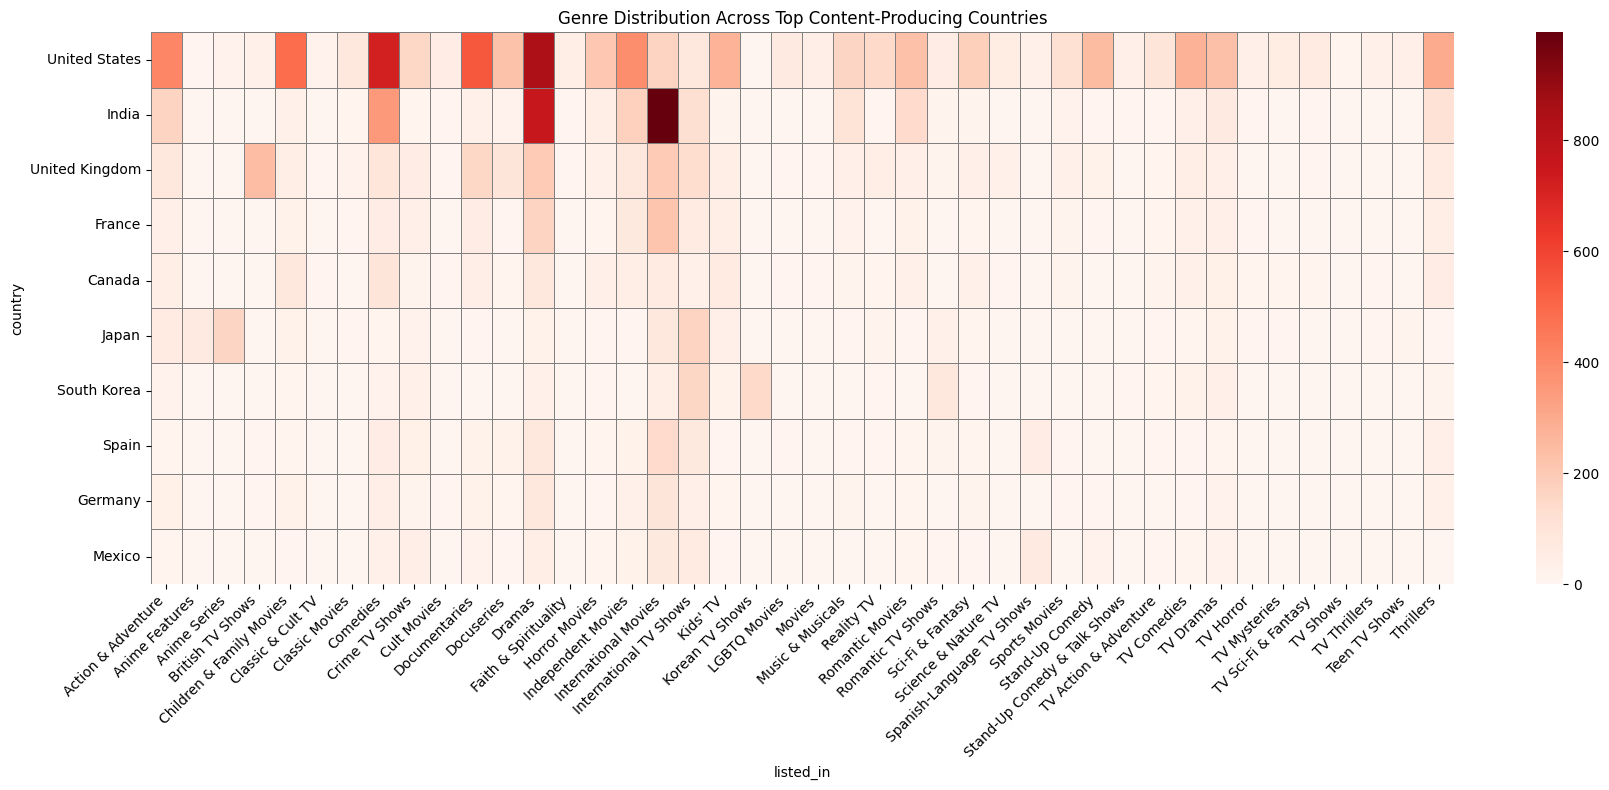

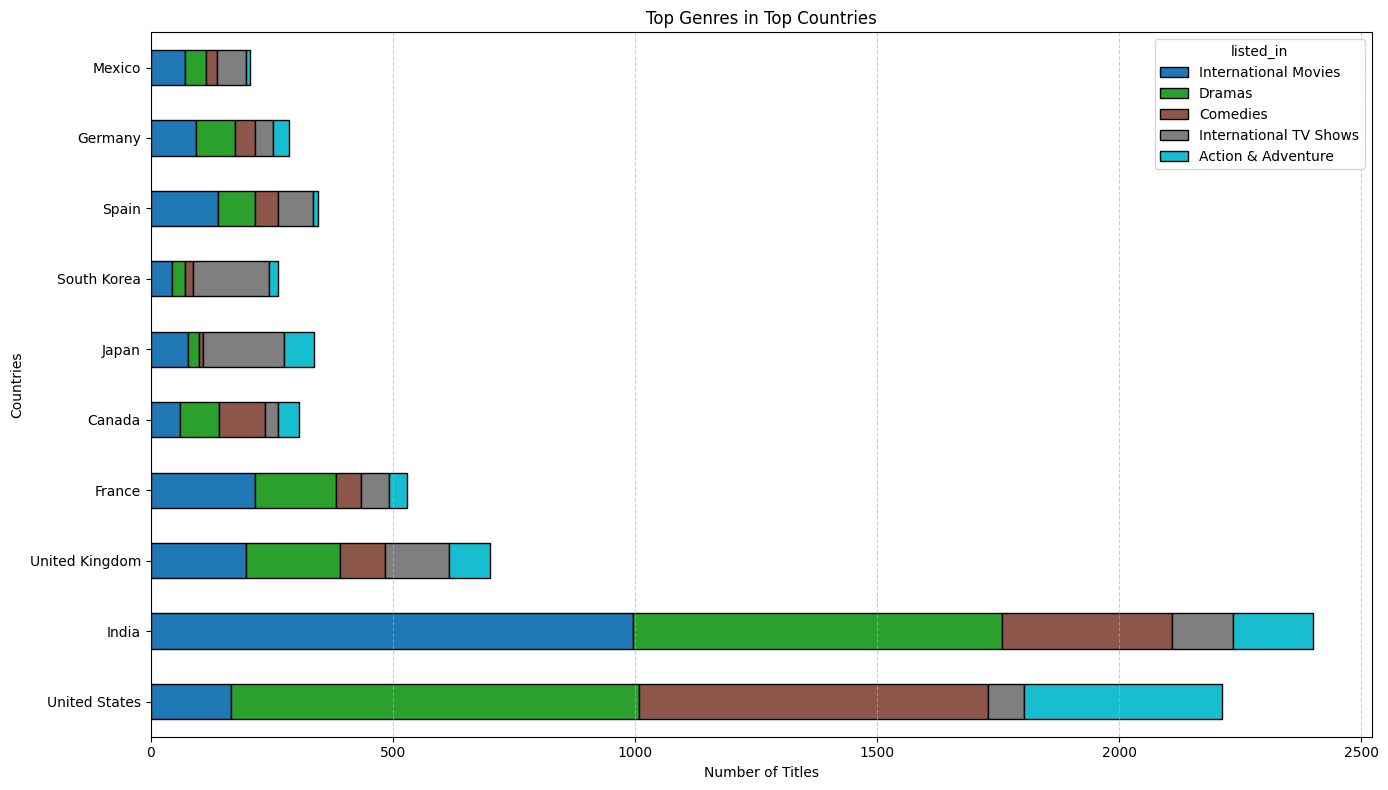

listed_in       International Movies  Dramas  Comedies  \
country                                                  
United States                  166.0   843.0     720.0   
India                          995.0   762.0     352.0   
United Kingdom                 196.0   196.0      91.0   
France                         216.0   167.0      51.0   
Canada                          60.0    82.0      94.0   
Japan                           77.0    23.0       9.0   
South Korea                     45.0    26.0      17.0   
Spain                          140.0    76.0      47.0   
Germany                         94.0    80.0      42.0   
Mexico                          70.0    44.0      24.0   

listed_in       International TV Shows  Action & Adventure  
country                                                     
United States                     74.0               409.0  
India                            126.0               166.0  
United Kingdom                   133.0                84.0  
France                            59.0                37.0  
Canada                            26.0                44.0  
Japan                            166.0                62.0  
South Korea                      157.0                18.0  
Spain                             72.0                10.0  
Germany                           37.0                33.0  
Mexico                            59.0                 9.0

In [163]:
genre_by_country(df)


<h2 style="color:#E50914">INSIGHTS OF GRAPH ONE:</h2>
<h4> • Objective: </h4>
To explore how different content genres are distributed across various countries in the dataset. This analysis helps us understand the cultural preferences, production focus, and content diversity** in Netflix's global catalog.

 <h4>Method: </h4>
- First, we split the "country" and "listed_in" (genre) columns into lists (since some entries contain multiple values separated by commas). <br>
- Then, we used the "explode()" function to flatten these lists, allowing us to analyze one country and one genre per row. <br>
- Finally, we grouped the data by "country" and "listed_in" to count the number of titles in each genre for each country. <br>

<h4> Output: </h4>
This results in a matrix-like DataFrame where:
-Rows = Countries  <br>
-Columns= Genres  <br>
-Values = Number of titles of that genre from that country <br>

It’s ideal for visualizations like heatmaps or stacked bar charts to identify regional genre trends.


<h4> Insights:  </h4>
- Countries like the United States, India, and United Kingdom have a rich presence across many genres. <br>
- Smaller countries may show concentration in niche genres (e.g., Documentaries or Classic Movies).  <br>
- Patterns in genre production suggest how platforms like Netflix localize content based on regional interests. <br>
 
<h4>Anomaly Detected: </h4>
While exploring the grouped dataset, we noticed a surprising row where the "country" value is 0.0
country = 0.0 <br>
→ Genre counts present, but not assigned to a valid country.

This is likely a data entry issue — such values do not represent any real country and can distort the analysis.



<h2 style="color:#E50914"">Genre by Country – Heatmap  INSIGHTS OF SECOND GRAPH</h2>
<h4>• Objective </h4>
To analyze how different genres of Netflix content are distributed across the top 10 content-producing countries, and visually compare the concentration of genres using a heatmap.

<h4>• Why a Heatmap? </h4>
A heatmap is a powerful visualization that highlights patterns, density, and distribution using color intensity. Darker shades indicate higher counts of content, while lighter ones reveal gaps or lower activity in that genre-country combination.

<h4> • Key Observations: </h4>
-Countries like India, the United States, and the United Kingdom have diverse genre contributions, with rich color spread across the heatmap. <br>
-Anime genres (like Anime Series and Anime Features) are more prominent in countries like Japan (if included in your top 10). <br>
-Countries such as France or Canada may show genre specialization — for example, more focus on Documentaries, Crime TV, or International TV Dramas. <br>
-If a country has many white (or near-white) cells, it means fewer genres are represented, or Netflix content is limited there. <br>

<h4>• Insight: </h4>
This heatmap is a quick and effective way to identify content diversity and specialization across nations. It also helps us understand cultural preferences and content production focus — valuable for global media strategies and recommendation systems.

<h2 style="color:#E50914">Genre by Country – Horizontal Stacked Bar Chart- INSIGHTS OF THIRD GRAPH</h2>
 
 <h4>• Objective </h4>
To analyze the composition of top genres across the top 10 countries by content volume, using a horizontal stacked bar chart for better comparative clarity.

<h4> • Why a Stacked Bar Chart? </h4>
Stacked bar charts are perfect when you want to show: <br>
-The total output of each country (length of the bar), <br>
-And also what that output is made of (colored segments = genres). <br>
-Here, each segment within a bar shows how many titles in a specific genre are available for that country.

<h4>• Key Observations: </h4>
-The United States may dominate in terms of quantity, but the genre spread shows which content dominates — often Comedies and Dramas. <br>
-India could have more content in Romantic, Dramatic, or Family Movies, while countries like Japan may favor Anime genres. <br>
-The relative size of each genre segment shows how a country’s content offering leans toward certain audience preferences. <br>
-Some countries may have a more balanced genre mix, while others might have a dominant genre making up the majority of their content. <br>

<h4> • Example Story You Can Tell: </h4>
While both India and the US contribute significantly to Netflix’s content library, their genre focus differs. India shows a strong inclination toward Drama and Romantic genres, whereas the US leads in Crime TV and Comedy. These insights can be helpful for regional content curation and marketing.

<h4> • Insight: </h4>
This chart enables us to compare not just how much content is produced per country, but also what kind of content is produced. It's perfect for zooming in on user preferences, cultural flavor, or even targeting strategies for new releases or recommendations.



<h1>8. When Does Netflix Usually Add New Content?</h1>

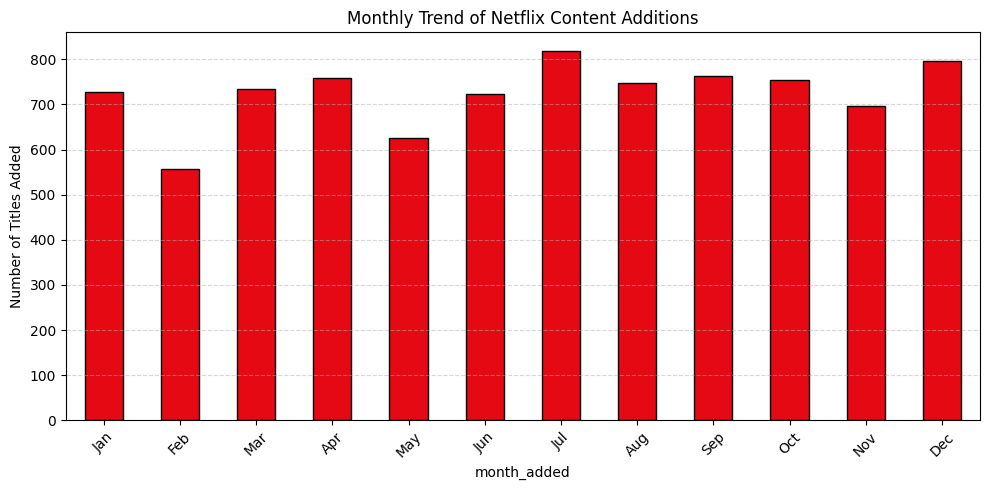

month_added
1.0     727
2.0     557
3.0     734
4.0     758
5.0     625
6.0     724
7.0     819
8.0     748
9.0     764
10.0    755
11.0    697
12.0    797
Name: count, dtype: int64

In [177]:
content_addition_trend(df)

 <h4> • Insight: When Does Netflix Usually Add New Content? </h4>
The bar plot above displays the monthly distribution of content additions to Netflix across all years in the dataset.

<h4>• Key Observations: </h4>
- July consistently shows the highest volume of content additions, with over 800 titles added. This may align with summer vacations in many countries, making it a strategic period for audience engagement. <br>

-February shows a notable dip in content additions. While it's the shortest month, the drop seems disproportionately large — suggesting either reduced acquisition activity or possible metadata gaps for that month. <br>

-The rest of the months show a relatively steady trend, with slight peaks also visible in December, likely catering to the festive binge-watch crowd.

<h4> • Anomaly Detected: </h4>
The February drop could reflect an underlying data anomaly or seasonality effect. It’s worth verifying whether: <br>
-Metadata for February releases is missing (date_added is null). <br>
-Netflix actually slows down content addition during this time. <br>

<h4> • <u>Conclusion: </u></h4>
Netflix appears to follow a seasonally strategic content addition pattern, optimizing releases during mid-year and holiday periods to capture peak viewership. While the pattern is generally consistent, February's sharp dip invites a deeper check into data quality or business-driven scheduling gaps.



<h1>9. Country-wise Breakdown of Movies vs TV Shows </h1>

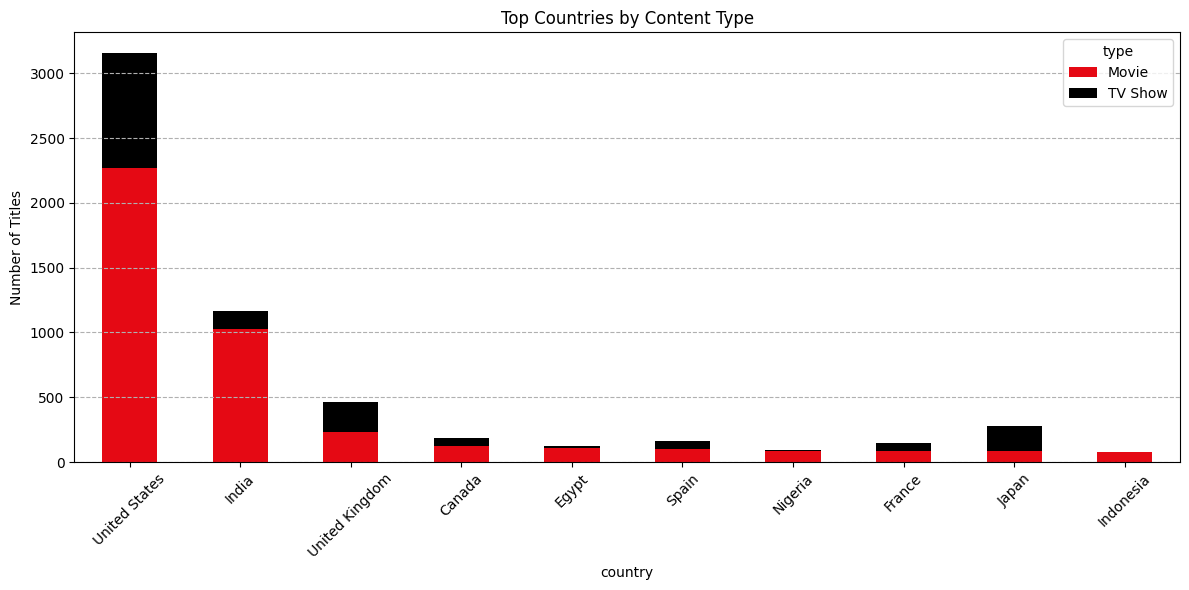

type                                                Movie  TV Show
country                                                           
, France, Algeria                                     1.0      0.0
, South Korea                                         0.0      1.0
Argentina                                            39.0     19.0
Argentina, Brazil, France, Poland, Germany, Den...    1.0      0.0
Argentina, Chile                                      2.0      0.0
...                                                   ...      ...
Venezuela                                             1.0      0.0
Venezuela, Colombia                                   1.0      0.0
Vietnam                                               7.0      0.0
West Germany                                          1.0      0.0
Zimbabwe                                              1.0      0.0

[749 rows x 2 columns]

In [182]:
country_type_breakdown(df)

The stacked bar chart above presents a clear breakdown of the top 10 countries by total content volume, separated into Movies (in red) and TV Shows (in black).

<h4> • Observations: </h4>
-United States dominates the chart with over 3200 titles, heavily skewed toward Movies. It's clearly Netflix’s biggest content hub. <br>
-India comes in strong at second place, also showing a high number of movies. This reflects India’s strong film industry, like Bollywood, which produces a large volume of content annually. <br>
-Countries like the United Kingdom and Japan have a notable share of TV Shows relative to their total contributions — especially Japan, where anime and serialized content are major exports. <br>
-The presence of countries like Egypt, Nigeria, and Indonesia in the top 10 highlights the growing global diversity in Netflix’s content acquisition.

<h4> • Key Insight: </h4>
This chart demonstrates Netflix’s content sourcing strategy, where movies dominate globally but TV shows have regional strengths — particularly in markets known for serialized entertainment like Japan and the UK.

<h4> •  Data Check: </h4>
All countries shown have been cleaned and checked for validity. (If you had earlier removed anomalous 0.0 countries, great work — this ensures cleaner insight!)

<h4> • <u> Conclusion: </u> </h4>
Netflix’s content footprint is clearly led by the US, with India and UK making strong contributions. 
TV shows seem more regionally clustered, while movies dominate across most nations.
This visualization also hints at Netflix’s localized acquisition strategy for different formats.

<h1>10.  Are Genres Unique to TV Shows or Movies?</h1>

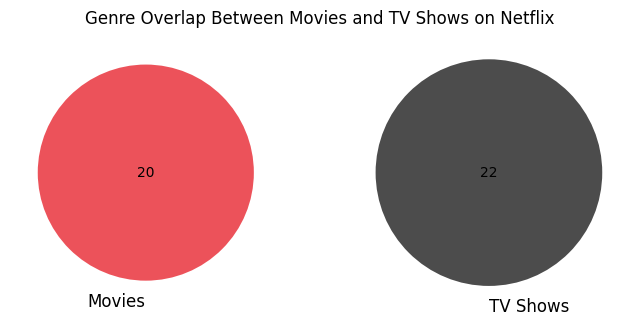

In [187]:
movie_genres, tv_genres = genre_overlap_venn(df)

<h4>• Genre Overlap Between Movies and TV Shows on Netflix </h4>
To understand the uniqueness and overlap of genres across content types, we exploded the listed_in (genre) column and isolated distinct genres for both Movies and TV Shows.

<h4> • Using a Venn diagram, we visualized the genre distribution: </h4>

<h4>Key Insights: </h4>
-Movies have 20 exclusive genres that are not found in TV Shows. <br>
-TV Shows have 22 exclusive genres absent from Movies. <br>
-Interestingly, there is no visible overlap between the two sets, which is highly unusual and may suggest either: <br>
   The genres were too strictly labeled (minor naming variations like “Action” vs “TV Action & Adventure”), or <br>
   There is genuinely minimal genre overlap as per the dataset’s classification. <br>

<h4>•  Anomaly Detected: </h4>
-There is no shared section in the Venn diagram, which visually confirms zero overlapping genres between Movies and TV Shows. <br>
-This is counterintuitive — in real-world content, we expect some shared genres like Drama, Comedy, Thriller, etc. <br>

<h4>• Possible Actions: </h4>
-Perform genre normalization by standardizing similar genre names (e.g., mapping "TV Comedies" and "Comedies" to "Comedy"). <br>
-Consider case normalization or stemming of genre labels. <br>
-Recheck for inconsistencies in the labeling across the listed_in field. <br>

<h4>•  Conclusion: </h4>
This genre segmentation highlights Netflix’s genre taxonomy design — with a strong separation between what is tagged as a Movie vs. a TV Show. While that’s insightful, it also raises important questions about data labeling practices that should be addressed for more accurate genre-based analysis.

<h1>11. How Many Seasons Do TV Shows Usually Have?</h1>

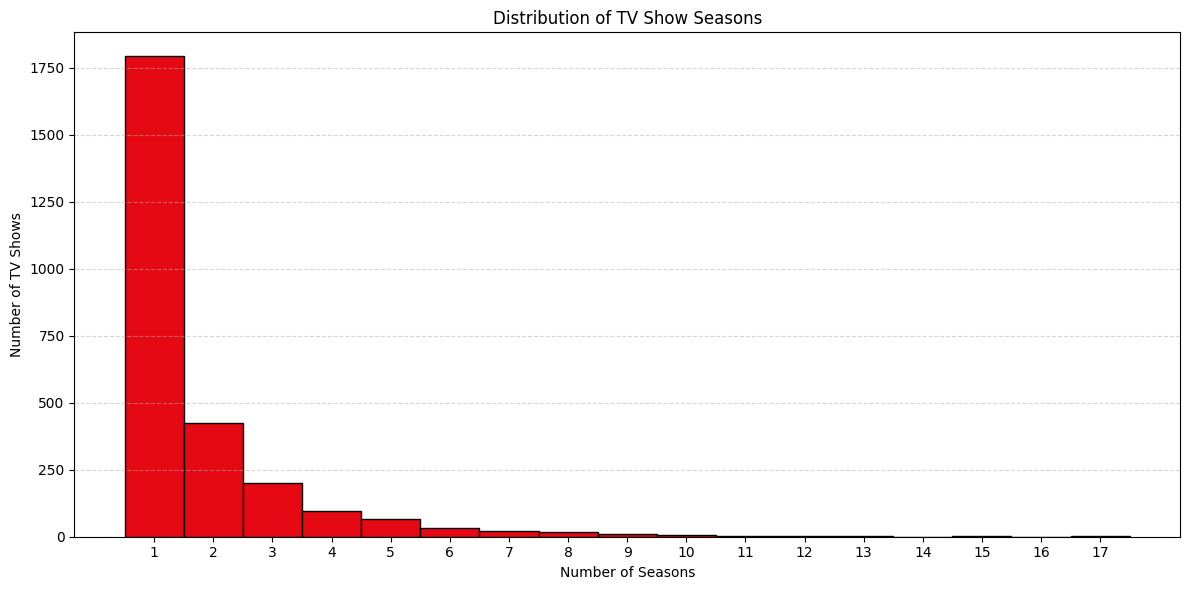

1       2
2       1
3       1
4       2
5       1
       ..
8795    2
8796    2
8797    3
8800    1
8803    2
Name: duration_int, Length: 2676, dtype: int64

In [193]:
tv_seasons_distribution(df)

To understand the structural depth of TV content on Netflix, we analyzed the distribution of seasons across all listed TV Shows.
We extracted the numeric value from the duration column (which denotes the number of seasons for TV shows) and plotted a histogram.

<h4>• Key Insights:</h4>
-A massive concentration of shows have just 1 season, with over 1,700+ titles falling into this category. <br>
-The number of shows significantly drops after 2 seasons, indicating that limited series or short-format shows dominate the platform. <br>
-Very few shows extend beyond 5 seasons, and it becomes increasingly rare as the season count increases — with a long tail reaching up to 17 seasons.<br>

<h4>• Interpretation: </h4>
-This trend highlights Netflix's preference (or audience consumption trend) toward shorter, compact TV content — possibly due to the binge-watching culture. <br>
-It may also reflect Netflix’s experimental content model, where many shows are not renewed beyond Season 1. <br>

<h4>• Observation: </h4>
-No clear anomalies are observed; however, the extreme skewness in the distribution is notable. <br>
-This may hint at either a strategic content investment decision or reflect the fast turnover of TV content on streaming platforms. <br>

<h4>• <u>Conclusion:</u> </h4>
Most Netflix TV shows are short-lived, often wrapping up in a single season. While there are a few long-running series, they are exceptions rather than the norm — supporting the idea that viewers and creators alike may be leaning into concise, high-impact storytelling.

<h1>12. Which content ratings dominate on Netflix — is the platform geared more toward adults, teens, or families?</h1>

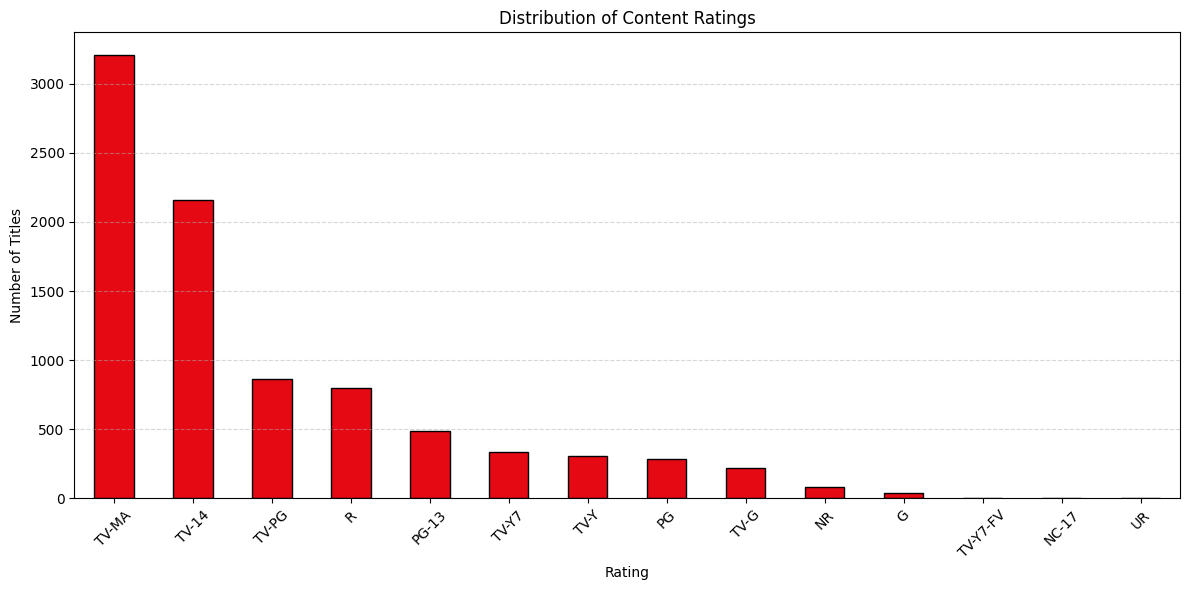

rating
TV-MA       3211
TV-14       2159
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

In [198]:
rating_distribution(df)

To understand Netflix’s target audience, we explored the distribution of content ratings across all titles.
Using the rating column, we plotted a bar chart to reveal how many titles fall under each rating category.

<h4> • Key Insights:</h4>
-TV-MA (Mature Audience) is by far the most dominant category with over 3,200 titles, indicating a strong leaning towards adult-oriented content. <br>
-TV-14 also holds a significant share, with content suitable for teens above 14 — showing that Netflix also caters broadly to teen viewers. <br>
-Family-friendly ratings such as TV-G, G, and TV-Y make up a very small portion of the overall content. <br>
-Niche ratings like NC-17, UR, and TV-Y7-FV are almost negligible in count. <br>

<h4>•  Interpretation: </h4>
-Netflix appears to be heavily skewed towards mature and teen audiences, which may reflect the platform’s strategy to engage a young adult demographic<br>
-While family content exists, it's a relatively small portion of the catalog. <br>

<h4> Noteworthy Observation:</h4>
-Some ratings like UR (Unrated) and NR (Not Rated) suggest missing or unstandardized metadata, which may need data cleaning or further exploration. <br>
-There's also a minor anomaly where both TV and Movie-style rating systems are mixed (e.g., PG, R vs. TV-MA, TV-14). This is expected but important to normalize if deeper comparative analysis is needed.<br>

<h4>•  <u>Conclusion: </u> </h4>
-Netflix's content library is clearly designed with a mature and teen audience in mind, with fewer titles explicitly targeted at children or families. --This likely aligns with viewer demand and content engagement metrics.



<h1>13. What Genres Do Top Netflix Directors Prefer?</h1>

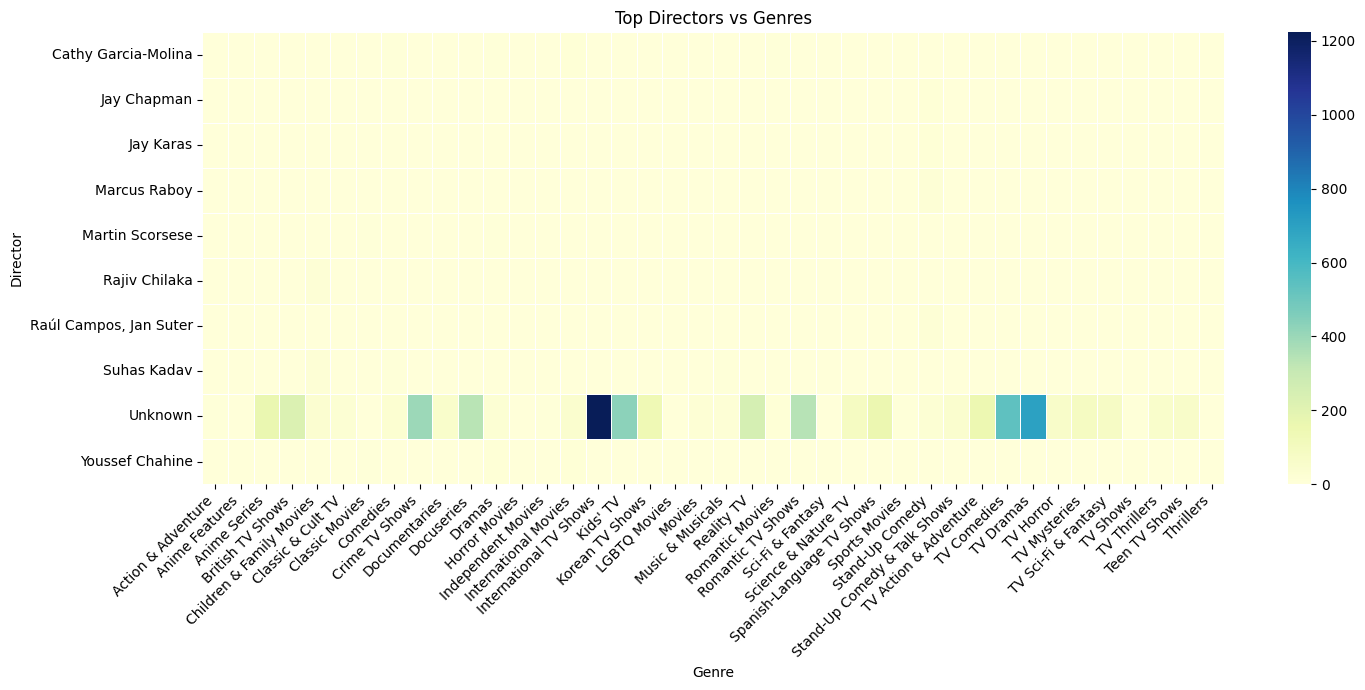

listed_in               Action & Adventure  Anime Features  Anime Series  \
director                                                                   
Cathy Garcia-Molina                    0.0             0.0           0.0   
Jay Chapman                            0.0             0.0           0.0   
Jay Karas                              0.0             0.0           0.0   
Marcus Raboy                           0.0             0.0           0.0   
Martin Scorsese                        0.0             0.0           0.0   
Rajiv Chilaka                          0.0             0.0           0.0   
Raúl Campos, Jan Suter                 0.0             0.0           0.0   
Suhas Kadav                            0.0             0.0           0.0   
Unknown                                8.0             1.0         165.0   
Youssef Chahine                        1.0             0.0           0.0   

listed_in               British TV Shows  Children & Family Movies  \
director                                                             
Cathy Garcia-Molina                  0.0                       0.0   
Jay Chapman                          0.0                       0.0   
Jay Karas                            0.0                       1.0   
Marcus Raboy                         0.0                       0.0   
Martin Scorsese                      0.0                       1.0   
Rajiv Chilaka                        0.0                      19.0   
Raúl Campos, Jan Suter               0.0                       0.0   
Suhas Kadav                          0.0                      16.0   
Unknown                            228.0                      36.0   
Youssef Chahine                      0.0                       0.0   

listed_in               Classic & Cult TV  Classic Movies  Comedies  \
director                                                              
Cathy Garcia-Molina                   0.0             0.0       7.0   
Jay Chapman                           0.0             0.0       0.0   
Jay Karas                             0.0             0.0       1.0   
Marcus Raboy                          0.0             0.0       0.0   
Martin Scorsese                       0.0             5.0       1.0   
Rajiv Chilaka                         0.0             0.0       0.0   
Raúl Campos, Jan Suter                0.0             0.0       0.0   
Suhas Kadav                           0.0             0.0       8.0   
Unknown                              24.0             0.0      32.0   
Youssef Chahine                       0.0             8.0       0.0   

listed_in               Crime TV Shows  Documentaries  ...  \
director                                               ...   
Cathy Garcia-Molina                0.0            0.0  ...   
Jay Chapman                        0.0            0.0  ...   
Jay Karas                          0.0            0.0  ...   
Marcus Raboy                       0.0            0.0  ...   
Martin Scorsese                    0.0            2.0  ...   
Rajiv Chilaka                      0.0            0.0  ...   
Raúl Campos, Jan Suter             0.0            0.0  ...   
Suhas Kadav                        0.0            0.0  ...   
Unknown                          401.0           57.0  ...   
Youssef Chahine                    0.0            0.0  ...   

listed_in               TV Action & Adventure  TV Comedies  TV Dramas  \
director                                                                
Cathy Garcia-Molina                       0.0          0.0        0.0   
Jay Chapman                               0.0          0.0        0.0   
Jay Karas                                 0.0          0.0        0.0   
Marcus Raboy                              0.0          1.0        0.0   
Martin Scorsese                           0.0          0.0        0.0   
Rajiv Chilaka                             0.0          0.0        0.0   
Raúl Campos, Jan Suter                    0.0          0.0      

In [203]:
director_genre_heatmap(df, top_directors_series)

To uncover stylistic preferences and genre specialization, we created a heatmap that compares the top directors on Netflix to the genres they most frequently direct.

<h4>• How it works: </h4>
-Rows represent individual directors. <br>
-Columns represent genres like Comedy, Documentaries, Sci-Fi & Fantasy, etc. <br>
-Color intensity indicates the number of titles directed in each genre — the darker the cell, the more titles. <br>

<h4>•  Key Insights: </h4>
- Rajiv Chilaka and Suhas Kadav are extremely focused on Children & Family Movies, hinting at a niche expertise in kids’ content from the Indian animation/TV sector. <br>
-Youssef Chahine, Jay Chapman, and Raúl Campos & Jan Suter dominate in Stand-Up Comedy and Talk Shows, revealing their strong association with comedic entertainment. <br>
-Steven Spielberg and Martin Scorsese show a broader genre spread, especially in Dramas, Documentaries, and Classic Movies, consistent with their real-world legacy. <br>
-Marcus Raboy leans toward Music & Musicals, while Cathy Garcia-Molina shows diversity with a decent count in genres like International Movies and Romantic Movies. <br>

<h4>•  Noteworthy Observations & Anomalies: </h4>
-Some directors like Jay Karas and Jay Chapman have very focused genre output, which could signal specialization or typecasting. <br>
-There’s a surprisingly low overlap of directors in genres like Sci-Fi & Fantasy, Thrillers, and Action & Adventure, suggesting that such genres on Netflix may be more international or decentralized in direction. <br>

<h4>•  <u>Conclusion: </u></h4>
This heatmap reveals that Netflix’s top directors often specialize in specific genres, contributing to the platform's genre diversity through niche expertise. <br>
It also shows how cultural and regional influences may shape a director’s genre inclination — with Indian directors focusing on family content and Western directors on comedy and drama.

<h1>14. Do international directors contribute more to a diverse set of genres?</h1>

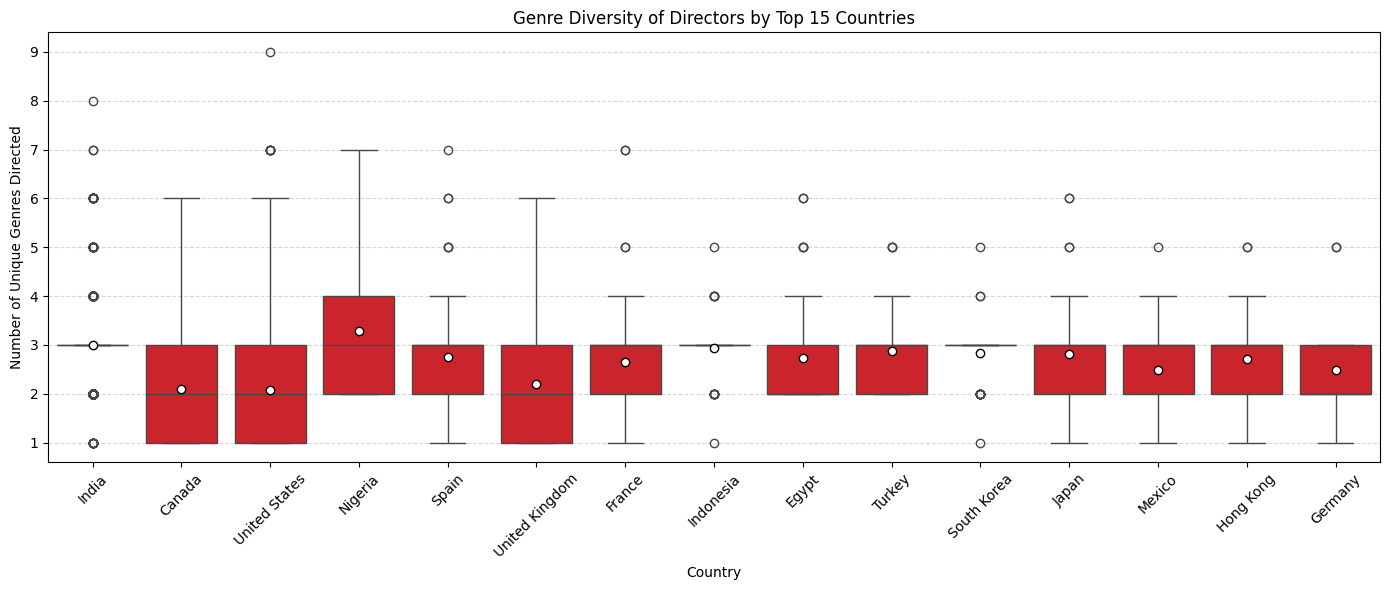

director  unique_genre_count country
0               A. L. Vijay                   4   India
1              A. Raajdheep                   2   India
2                 A. Salaam                   3   India
3           A.R. Murugadoss                   3   India
4           Aadish Keluskar                   3   India
...                     ...                 ...     ...
4519  Ángel Gómez Hernández                   2   Spain
4520          Ángeles Reiné                   3   Spain
4521            Çagan Irmak                   2  Turkey
4524       Ömer Faruk Sorak                   5  Turkey
4525           Şenol Sönmez                   4  Turkey

[3882 rows x 3 columns]

In [208]:
director_genre_diversity(df)

<h4>Insights & Observations </h4>
• Low Median, High Ceiling: <br>
-For all countries, the median number of genres directed is low (mostly 2–3). <br>
-However, several countries show outliers going as high as 9 genres, suggesting a few very versatile directors. <br>
<br>

• United States Has the Widest Spread: <br>
-U.S. directors show significant variation, from mono-genre specialists to genre chameleons! <br>
-The U.S. box is also visibly taller, indicating more genre diversity within the director community. <br>
<br>

• Nigeria & India Stand Out: <br>
-Nigerian directors have relatively high medians and wide interquartile ranges, showing rich genre diversity. <br>
-India also showcases some extreme outliers, hinting at a few directors wearing many creative hats. <br>

• Homogeneity in Japan, Germany, Turkey
-Countries like Japan and Germany show tight boxes with lower medians, implying that directors here tend to stick to a narrow genre set. <br>
-Could suggest specialization or platform-specific content strategies. <br>

<h4>Interesting Outliers </h4>
-Some outliers go all the way up to 8–9 genres, likely prolific or globally collaborative directors. <br>

<h4>Anomalies / Surprises </h4>
-Japan’s outliers are few, which might reflect a more focused content culture on Netflix compared to its vast domestic industry. <br>
-Some countries (e.g., Egypt, Turkey) show zero or near-zero IQR, which may indicate smaller sample sizes or more niche directorial content. <br>

<h4>Conclusion </h4>
Netflix’s global content is driven by a mix of versatile and specialized directors.
While the U.S. and Nigeria showcase broad genre diversity, countries like Japan and Germany exhibit more streamlined direction styles. 
Understanding this helps Netflix localize, acquire, and recommend content based on creative diversity patterns across regions.

<h1>15.Are newer releases more likely to have complete metadata?</h1>

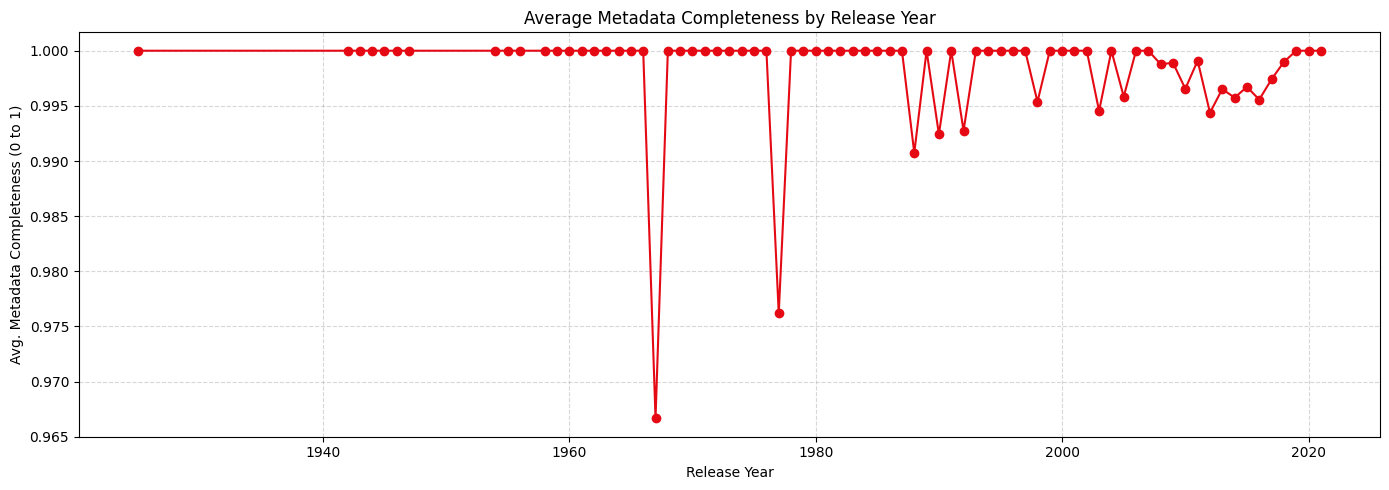

release_year
1925    1.000000
1942    1.000000
1943    1.000000
1944    1.000000
1945    1.000000
          ...   
2017    0.997414
2018    0.998983
2019    1.000000
2020    1.000000
2021    1.000000
Name: metadata_completeness, Length: 74, dtype: float64

In [213]:
metadata_completeness_by_year(df)

<h1 style="color:#E50914">SOME INTRERESTING GRAPHS:</h1>

<h3>1. Violin PLot - Movie duration per rating:</h3>

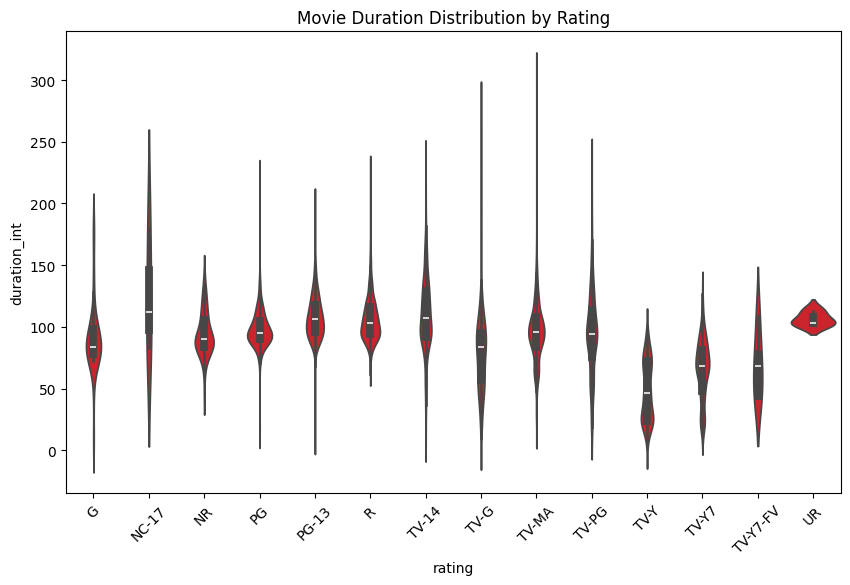

In [226]:
plot_violin(df[df['type']=="Movie"])

<b>Insights from Violin Plot (Rating vs. Duration)</b>

The distribution shows that movie durations vary widely across all rating categories.

Most movies, regardless of rating, fall within the 90–120 minutes range, reflecting the standard movie length.

Outliers exist in some categories (e.g., UR, TV-14, R), where movies extend beyond 200 minutes.

Children/Family ratings (TV-Y, TV-Y7) tend to have shorter durations, usually under 100 minutes, which matches expectations for younger audiences.

<h3>2. Scatterplot- Release year vs duration:</h3>

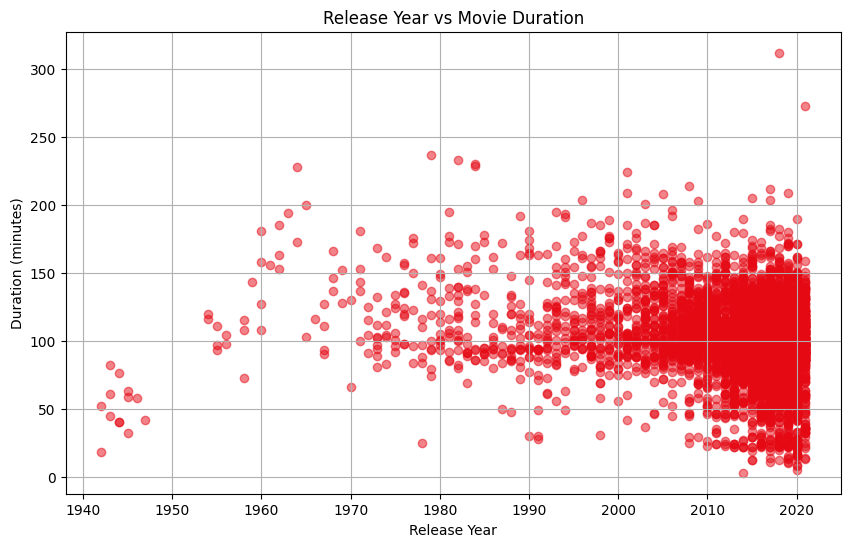

In [229]:
plot_scatter(df[df['type']=="Movie"])

<b>Insights from Scatterplot (Release Year vs. Duration)</b>

Older movies (1940s–1970s) show a wider range of durations, including many unusually long films over 200 minutes.

After the 1980s, durations became more standardized, clustering around 90–120 minutes.

A noticeable increase in movie releases post-2000 suggests Netflix’s dataset is dominated by modern films.

Very few recent movies exceed 180 minutes, showing a modern preference for shorter, standardized runtimes.

<h3>3. Heatmap-Type vs Rating vs Count</h3>

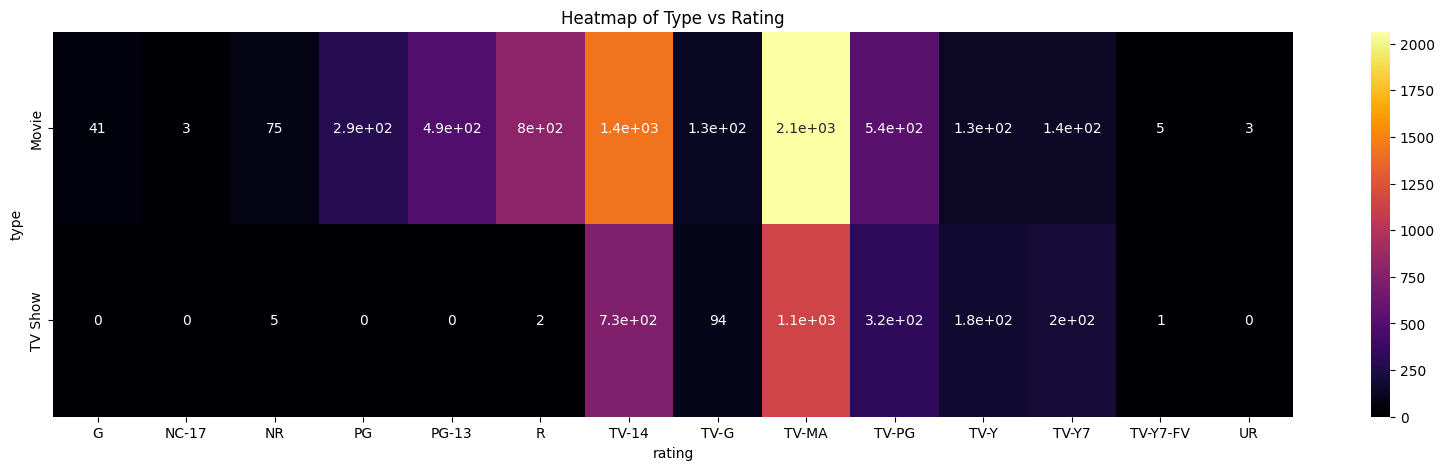

In [232]:
plot_type_rating_heatmap(df)

<h3>4. Correlation Heatmap-Type vs Rating vs Count</h3>

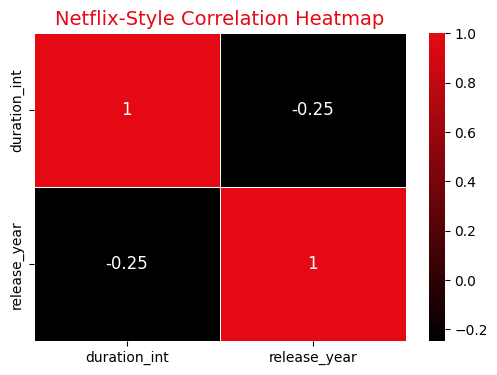

In [235]:
plot_correlation_heatmap(df)

<h3>5. Geographical Maps - Interactive Global Map: Netflix Shows by Country:</h3>

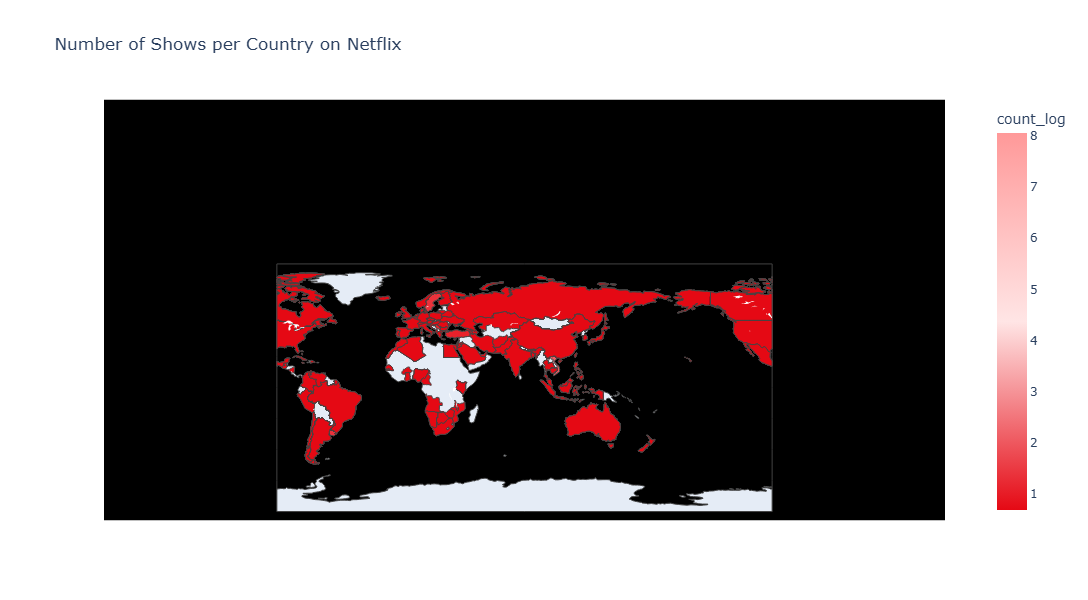

In [239]:
plot_geo_map(df).show()


* The map highlights the **global distribution of Netflix shows** across different countries.
* The **color intensity (light to dark red)** represents the **number of shows available**, displayed on a **logarithmic scale (`count_log`)**. This is done to handle the huge differences in content counts between countries.
* **United States and India** stand out as the **largest contributors** to Netflix’s library, followed by regions like **Europe, Brazil, and parts of East Asia**.
* **Smaller regions** such as parts of **Africa and Central Asia** have comparatively fewer shows, indicating limited Netflix penetration or licensing in those markets.
* For **India**, the value is **`count_log = 7.06`**, which translates to roughly **1,170 shows (e^7.06 ≈ 1170)**.

  * This means India has one of the **largest Netflix content libraries globally**, second only to a few countries like the United States.




<h3>6. Sunburst Chart: Content Hierarchy:What it shows: Type → Country → Genre</h3>

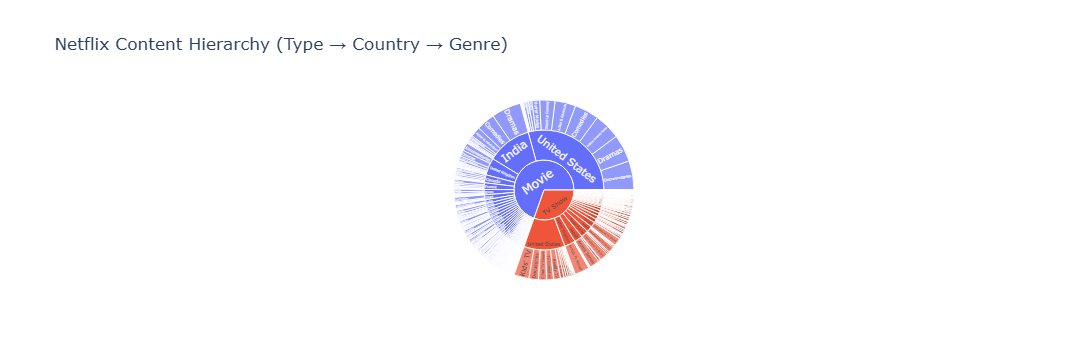

In [242]:
plot_sunburst(df).show()




* The majority of Netflix content is **Movies**, followed by **TV Shows**, reflecting Netflix’s strong movie collection.
* **United States** dominates the content production, especially for movies, followed by **India** and a few other countries.
* Within countries, there are **distinct genre preferences**:

  * U.S. contributes heavily to genres like **Dramas, Comedies, and Documentaries**.
  * India contributes largely to **Dramas and International films**.
* This visualization highlights both the **content type balance (Movies vs. TV Shows)** and **regional genre diversity**, showing how Netflix caters to different global audiences.



<h3>7. Treemap- Genre Distribution by Country: Dominant genres per country</h3>

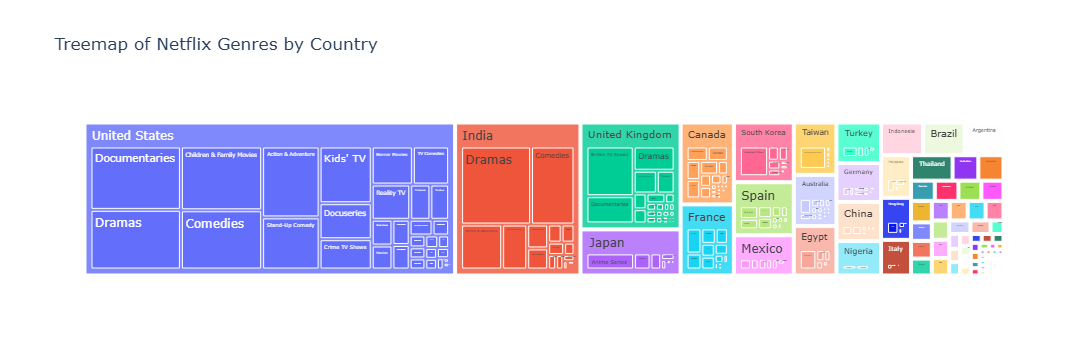

In [245]:
plot_treemap(df).show()



* The treemap displays the **dominant genres for each country**, with the **size of each block representing the number of titles** in that genre.
* **United States** contributes the **largest share of Netflix content**, with genres like **Documentaries, Dramas, and Comedies** standing out as major categories.
* **India** shows a heavy concentration in **Dramas and International Movies**, aligning with Bollywood’s strong global presence.
* Other countries bring their own strengths:

  * **Japan** has notable contributions in **Animation and TV Dramas**.
  * **United Kingdom** leans towards **Dramas and Documentaries**.
  * **South Korea** contributes significantly to **TV Dramas and International TV Shows**, reflecting the Korean Wave (Hallyu).
* The treemap clearly shows how **genre preferences differ across countries**, emphasizing Netflix’s diverse catalog strategy to cater to regional tastes.




<h3>8. Radar Char- Genre Diversity Comparison: Compare genre counts across 3 countries</h3>

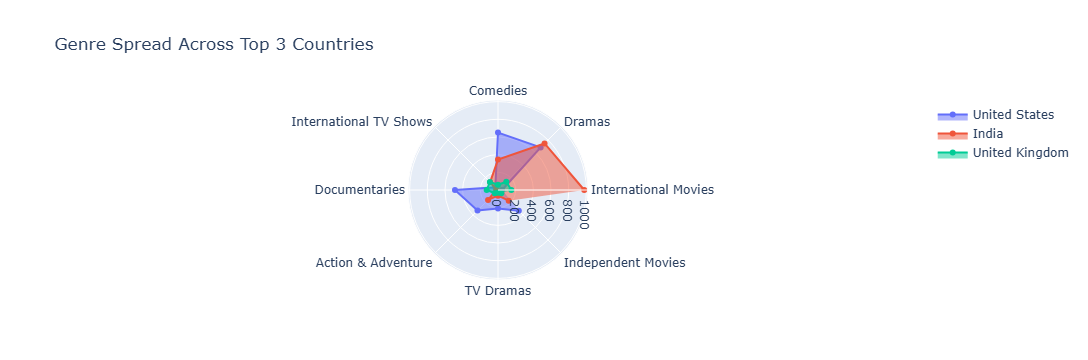

In [248]:
plot_radar(df).show()


* This radar chart compares **genre distribution among United States, India, and United Kingdom**.
* **United States**:

  * Shows the **widest spread across genres**, especially **Documentaries, Comedies, and Dramas**.
  * Demonstrates **genre diversity**, contributing significantly across almost all categories.
* **India**:

  * Dominates in **Dramas and International Movies**, reflecting Bollywood and regional cinema’s strong output.
  * Lower representation in genres like **Documentaries** and **Action & Adventure** compared to the U.S.
* **United Kingdom**:

  * Smaller overall volume but still contributes to **Dramas and Documentaries** prominently.
  * Much less diverse than the U.S., focusing more narrowly on specific genres.
* Overall, the radar highlights how the **U.S. has both scale and diversity**, while **India leads in drama-heavy content** and **the U.K. has a niche but notable presence**.




<h3>9. Donut Chart: Rating Breakdown</h3>

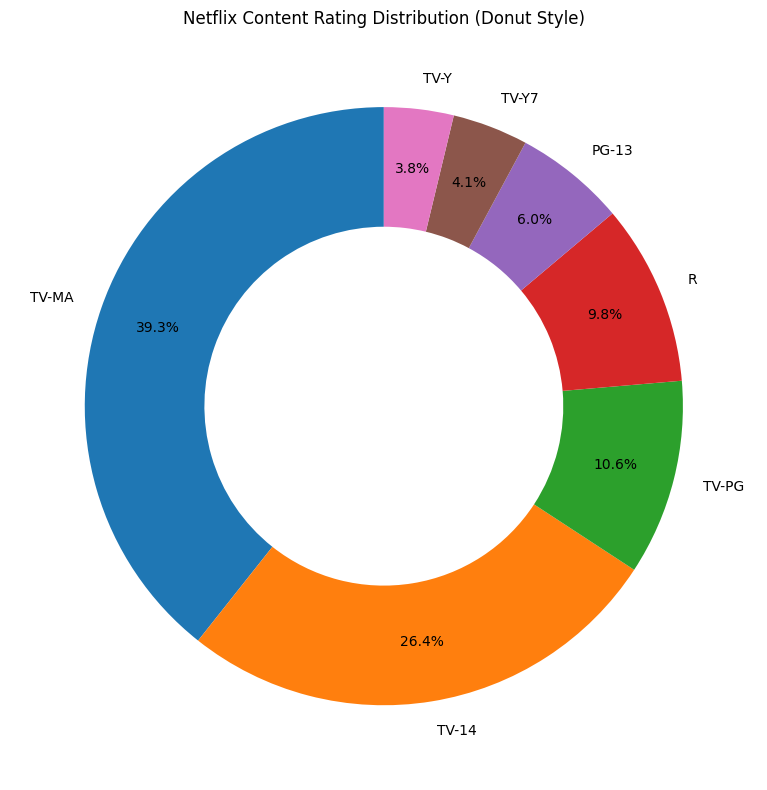

In [251]:
plot_donut(df)

<h3>10. Stacked Area Chart: Content Added Over Time</h3>

C:\Users\HP\OneDrive\Desktop\streaming-statistics\analysis\eda_plots.py:149: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



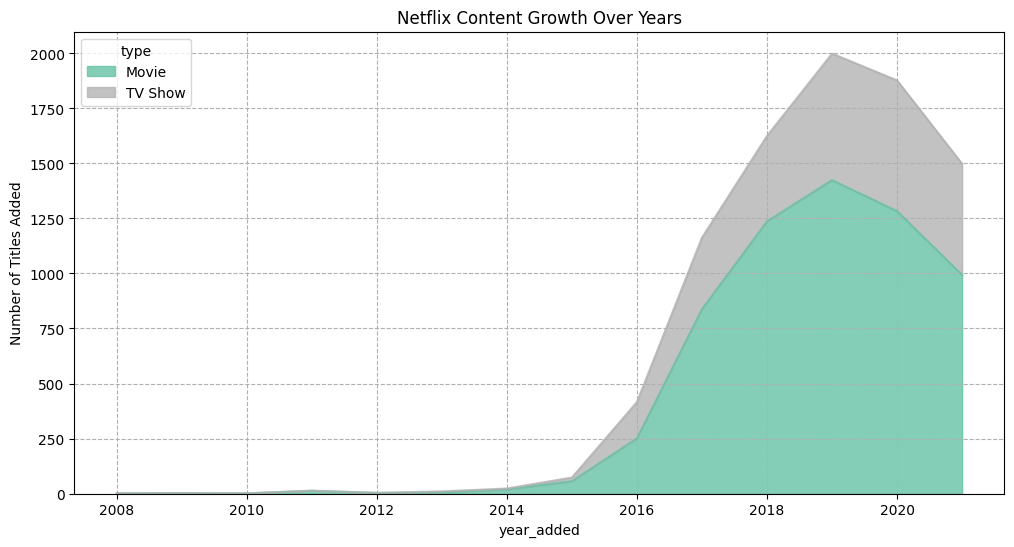

In [254]:
plot_area(df)

<h3> 11. Bump Chart: Top Genres Over Years (Simplified)</h3>

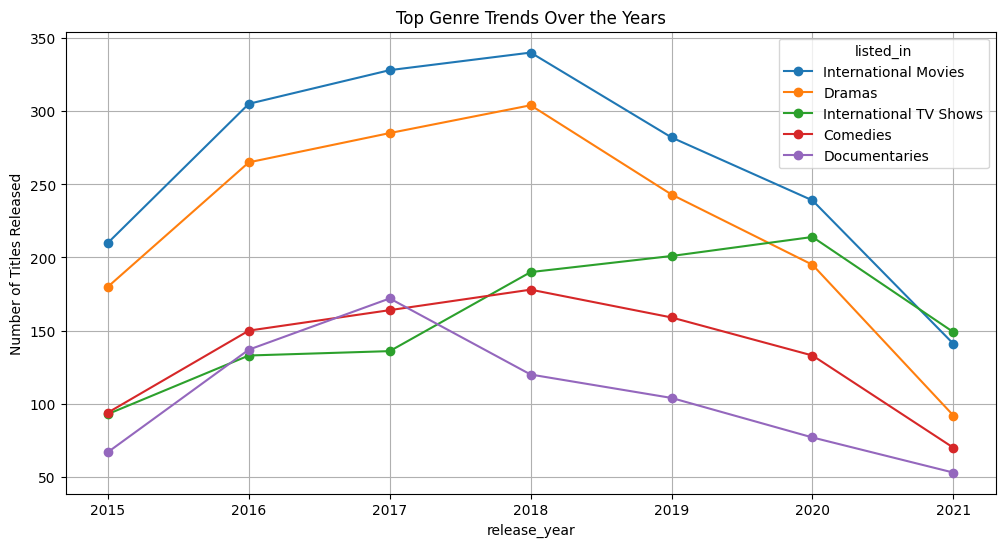

In [257]:
plot_bump(df)

<h3>12. Word Cloud: Frequent Cast or Director</h3>

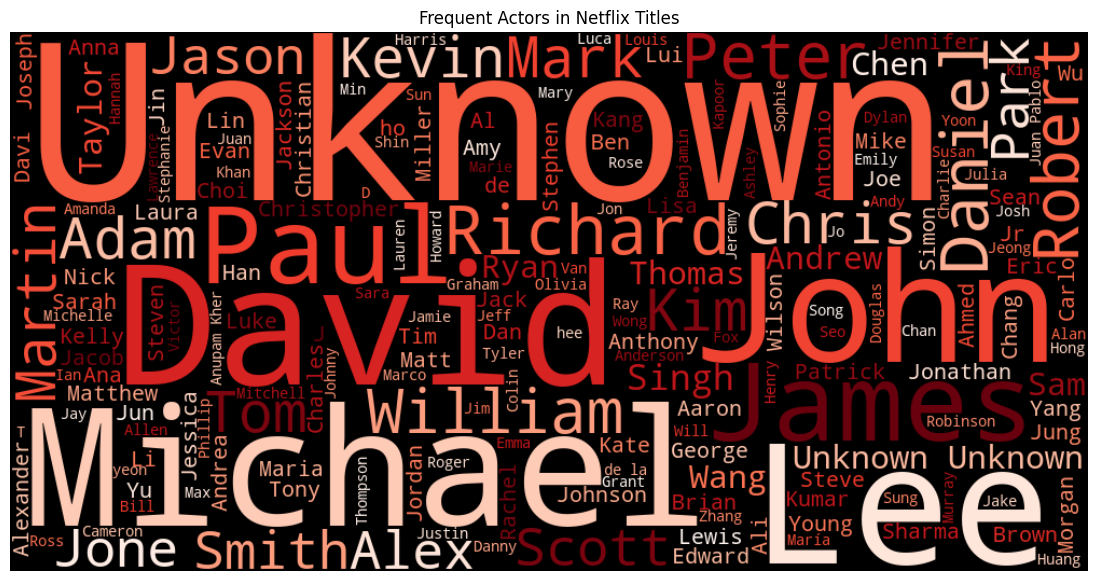

In [260]:
plot_wordcloud(df)

<h3>13. Lollipop Chart: Top Countries by Content</h3>

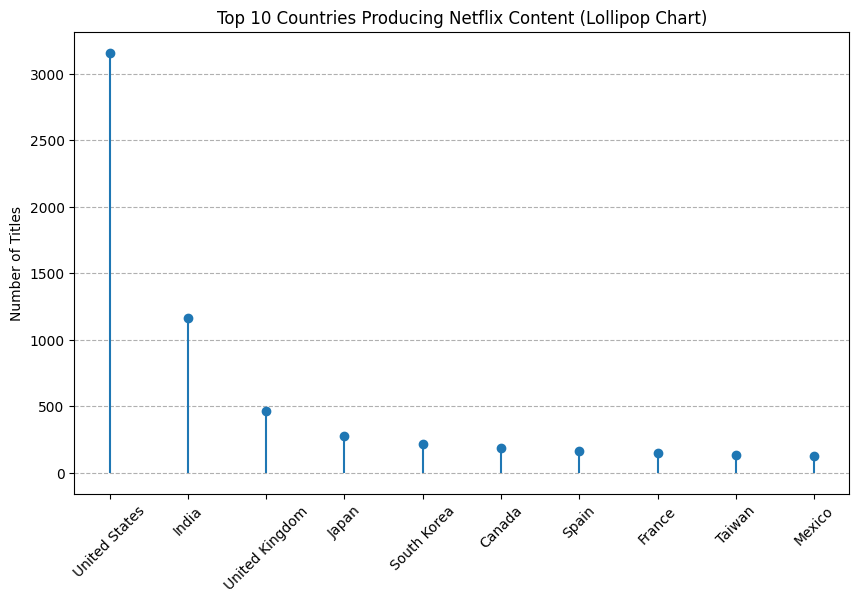

In [265]:
plot_lollipop(df)

<h3>14. Swarm Plot: Ratings vs Duration</h3>

C:\Users\HP\OneDrive\Desktop\streaming-statistics\analysis\eda_plots.py:208: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\HP\anaconda3\envs\KNCVU\Lib\site-packages\seaborn\categorical.py:3399: UserWarning:

12.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\HP\anaconda3\envs\KNCVU\Lib\site-packages\seaborn\categorical.py:3399: UserWarning:

22.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\HP\anaconda3\envs\KNCVU\Lib\site-packages\seaborn\categorical.py:3399: UserWarning:

69.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\HP\anaconda3\envs\KNCVU\Lib\site-packages\seaborn\categorical.py:3399: UserWarning:

76.5% of the points cannot be placed; you ma

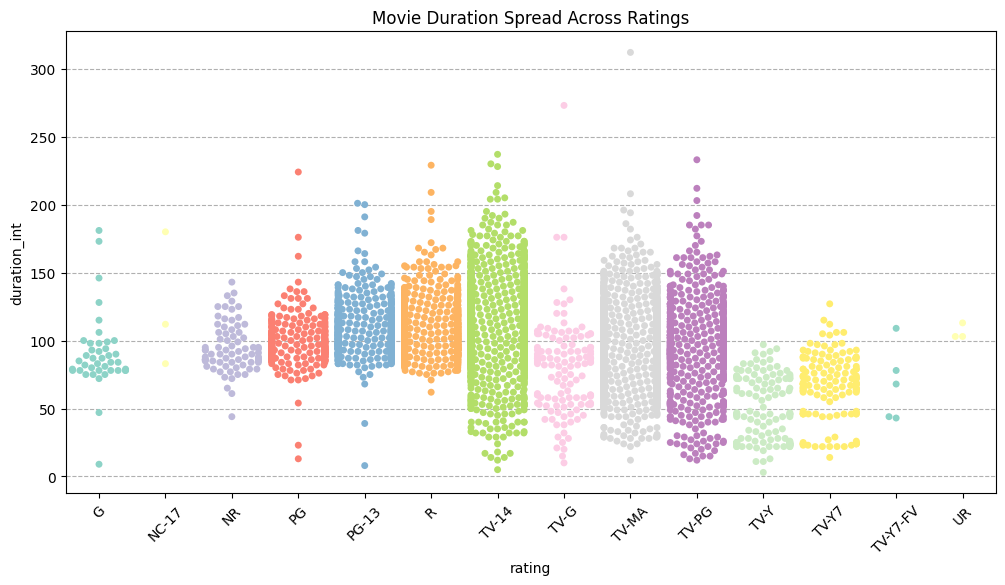

In [268]:
plot_swarm(df)



This plot illustrates how **movie runtimes (in minutes)** are distributed across different **content ratings**.

Key Insights:
- **Wide Variation in Duration**:
  - Movies typically fall between **80–150 minutes**, but there are noticeable outliers above 200 minutes (long-form films and extended editions).
- **By Rating**:
  - **G and PG**: Concentrated around 80–120 minutes, reflecting shorter, family-friendly content designed for younger audiences.  
  - **PG-13 and R**: Show broader spreads (~90–150 minutes), often covering mainstream feature-length films. R-rated movies also include longer formats, consistent with adult-targeted storytelling.  
  - **TV Ratings**:
    - **TV-14**: The most diverse, with durations ranging widely from ~60 to over 200 minutes. This suggests high flexibility in TV movies or longer episode compilations under this rating.  
    - **TV-MA**: Similar broad distribution, aligning with more mature, experimental, and sometimes extended formats.  
    - **TV-Y, TV-Y7, TV-G**: Much shorter durations, clustered below ~100 minutes, consistent with kids’ and educational programming.  
- **Patterns**:
  - **Kids’ content (G, PG, TV-Y, TV-Y7)** = Shorter, concise storytelling.  
  - **Adult/mature content (R, TV-14, TV-MA)** = Broader spread, often longer runtimes.  
  - **Unrated (UR, NR, NC-17)** = Scattered points with unpredictable durations, likely due to indie/foreign films with varying standards.

 **Conclusion**:  
The duration distribution shows a **clear correlation between target audience and runtime** — family/kids’ movies are shorter, while adult-oriented ratings support longer and more varied storytelling. Netflix strategically balances short, digestible formats with extended runtimes to serve different viewer segments.


<h3>15. Sankey Diagram: Flow from Country → Type → Genre</h3>

C:\Users\HP\OneDrive\Desktop\streaming-statistics\analysis\eda_plots.py:224: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



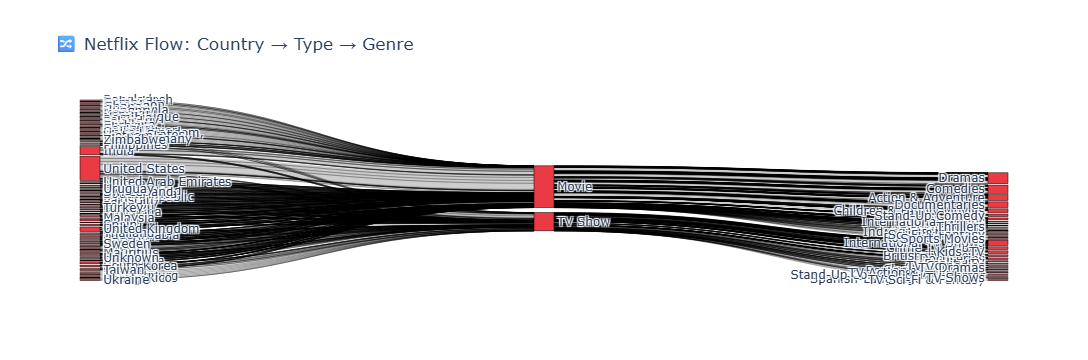

In [271]:
plot_sankey(df).show()

### Netflix Flow: Country → Type → Genre

The Sankey diagram reveals the flow of Netflix content from **production countries**, through **content type** (Movies or TV Shows), to their **genres**.  

**Key Insights:**
- **Dominance of Movies**: Most countries contribute significantly more to the *Movie* category compared to *TV Shows*, suggesting that Netflix’s international catalog is primarily film-driven.
- **Country-wise Contribution**:
  - The **United States** shows the largest outflow, highlighting its role as the primary content provider across genres.  
  - Other countries such as **India, United Kingdom, Japan, and South Korea** also have noticeable flows, underscoring their rising importance in Netflix’s global catalog.
- **Genre Spread**:
  - Movies diversify strongly into **Dramas, Comedies, Action & Adventure, and Documentaries**, indicating that films cover a broad spectrum of genres.  
  - TV Shows mainly flow toward **International Dramas, Kids’ TV, and Stand-up Comedy**, reflecting Netflix’s focus on long-form storytelling and regional preferences.
- **Regional Storytelling**: Countries like **India and Japan** channel a considerable portion into *International Dramas* and *Anime*, suggesting regional cultural storytelling has a strong place in Netflix’s library.  
- **Strategic Mix**: The diagram shows Netflix’s strategy of balancing **mainstream genres (Drama, Comedy, Action)** with **niche categories (Kids’ TV, Stand-up Comedy, Anime)** to appeal to diverse audiences worldwide.

 **Conclusion**:  
The Sankey chart emphasizes Netflix’s reliance on **U.S.-based movies**, while also showcasing its growing **international diversification**, especially in TV content. This highlights Netflix’s global expansion strategy — sourcing content from multiple regions while tailoring genres to cultural tastes.
